<h1>Table BENEFICIARY,EVALUATION,SEASON<h1>

In [2]:
#importations
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import spearmanr
from statsmodels.graphics.mosaicplot import mosaic


In [ ]:
#datas
mes_feuilles = pd.read_excel('../data/eventzella_schema_general.xlsx', sheet_name=['SUBCATEGORY','CATEGORY','PROVIDER','SERVICE','MARKETING_SPEND','BENEFICIARY','EVALUATION','saison','locations','VISITORS'])
df_spend = mes_feuilles['MARKETING_SPEND']
beneficiary=mes_feuilles['BENEFICIARY']
evaluation=mes_feuilles['EVALUATION']
Season=mes_feuilles['saison']
df_loc = mes_feuilles['locations']
df_visitors=mes_feuilles['VISITORS']
df_service = mes_feuilles['SERVICE']
df_provider = mes_feuilles['PROVIDER']
df_category =mes_feuilles['CATEGORY']
df_subcategory = mes_feuilles['SUBCATEGORY']



In [19]:
print("Beneficiary :", beneficiary.shape)
print("Evaluation :", evaluation.shape)
print("Season :", Season.shape)

Beneficiary : (5000, 5)
Evaluation : (12000, 4)
Season : (1461, 4)


In [20]:
evaluation['rating'].describe()

count    12000.000000
mean         3.189083
std          1.907520
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: rating, dtype: float64

<h3 style="color:red">evaluation : Q1,Q2,Q3 </h3>

In [21]:
beneficiary.isnull().sum()


id_beneficiary      0
first_name          0
last_name         348
email             400
phone             389
dtype: int64

<h3 style="color:red">BENEFICIARY : Des valeurs manquantes dans : last_name ,email et phone  </h3>
<h3 style="color:red">BENEFICIARY: Missing values in: last_name, email, and phone</h3>


In [22]:
evaluation.isnull().sum()

id_evaluation       0
id_reservation      0
rating              0
comment           966
dtype: int64

<h3 style="color:red">evalation: valeurs manquantes dans comment</h3>
<h3 style="color:red">evalation: Missing values in: comment</h3>


In [23]:
def boxplots(df, name):
    num_cols = df.select_dtypes(include=np.number).columns

    # Supprimer les colonnes ID
    num_cols = [col for col in num_cols if not col.lower().startswith("id")]

    for col in num_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"{name} - Boxplot de {col}")
        plt.show()


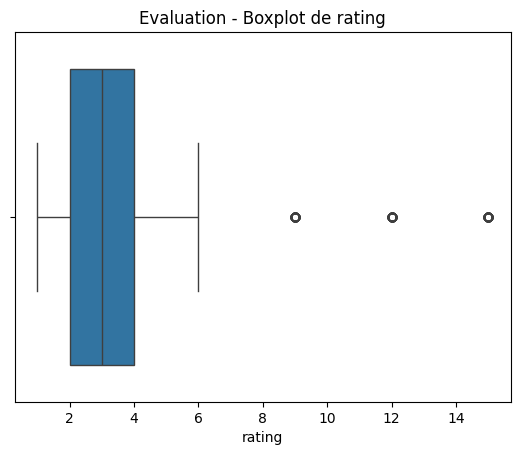

In [24]:
boxplots(evaluation, "Evaluation")

<h3 style="color:red" >**Interprétation – Boxplot de la variable rating**<br/>

La distribution du rating est centrée sur des valeurs faibles à moyennes, avec une médiane autour de 3 et une dispersion modérée.Présence de valeurs élevées au-delà de la moustache . Ces valeurs aberrantes sont valides et cohérentes avec l’échelle de mesure ; elles sont donc conservées. La médiane est retenue comme mesure de tendance centrale, car elle est robuste aux valeurs extrêmes.<br/>
<br/>
<h3 style="color:red"><strong>Interpretation – Boxplot of the rating variable</strong><br/>

The distribution of the rating is centered around low to medium values, with a median around 3 and moderate dispersion. The presence of high values beyond the upper whisker is observed. These outliers are valid and consistent with the measurement scale and are therefore retained. The median is chosen as the measure of central tendency, as it is robust to extreme values.<br/>

</h3>

</h3>

In [25]:
def detect_outliers(df, name):
    num_cols = df.select_dtypes(include=np.number).columns
    num_cols = [col for col in num_cols if not col.lower().startswith("id")]

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\nTable: {name}")
        print(f"Variable: {col}")
        print(f"Nombre d'outliers détectés: {outliers.shape[0]}")

        if outliers.shape[0] > 0:
            display(outliers[[col]])


In [26]:
detect_outliers(evaluation, "Evaluation")


Table: Evaluation
Variable: rating
Nombre d'outliers détectés: 228


rating
42          9
83         12
112         9
124         9
227         9
...       ...
11272      12
11328      15
11336      15
11542      15
11697      15

[228 rows x 1 columns]

<h3 style="color:red"> EVALUATION: Presence de valeurs manquantes dans colonne Rating</h3>


Même si la méthode IQR les détecte comme “outliers” :

👉 Ce sont des valeurs normales
👉 Elles respectent l’échelle logique (1–15)
👉 Donc on ne les supprime PAS

**1.1 ANALYSE UNIVARIE**(variable par variable)

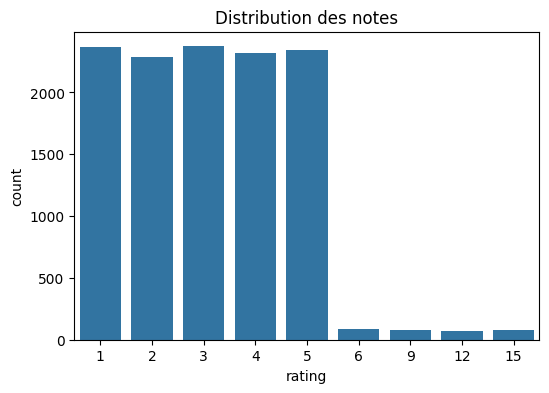

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=evaluation)
plt.title("Distribution des notes")
plt.show()


**Interprétation – Distribution des notes**

La distribution des notes est fortement concentrée entre 1 et 5, indiquant que la majorité des évaluations se situent dans cette plage. Les notes élevées (au-delà de 5) sont rares, ce qui traduit une asymétrie à droite de la distribution.



The distribution of ratings is highly concentrated between 1 and 5, indicating that the majority of evaluations fall within this range. High ratings (above 5) are rare, which reflects right skewness in the distribution.

Le graphique montre une absence de relation (indépendance) entre le rating et la présence de commentaire. Les deux boîtes à moustaches sont parfaitement superposables, ce qui indique que la distribution des notes est identique, que l'utilisateur ait rédigé un commentaire ou non. La présence d'un commentaire n'influence donc pas la note attribuée.


The chart shows no relationship (independence) between the rating and the presence of a comment. The two boxplots are perfectly overlapping, indicating that the distribution of ratings is identical whether the user has written a comment or not. Therefore, the presence of a comment does not influence the rating given.

**1.2 :ANALYSE UNIVARIÉE** (categorielle)

**Analyse univariée – Variables catégorielles (table beneficiary)**

Les variables catégorielles disponibles dans la table beneficiary (telles que first_name, last_name, email et phone) correspondent à des informations personnelles identifiantes. Ces variables présentent une forte cardinalité (valeurs presque toutes uniques) et ne portent pas de signification statistique exploitable dans le cadre d’une analyse descriptive.


The categorical variables available in the beneficiary table (such as first_name, last_name, email, and phone) correspond to personally identifiable information. These variables have high cardinality (almost all values are unique) and do not carry exploitable statistical meaning within the context of descriptive analysis.

**Analyse univariée – Variables catégorielles (table evaluation)**

La variable comment est une variable qualitative textuelle à forte cardinalité, dont les modalités sont majoritairement uniques. Par conséquent, aucune analyse univariée graphique n’est réalisée sur le contenu des commentaires


The comment variable is a high-cardinality textual qualitative variable, with most values being unique. Therefore, no univariate graphical analysis is performed on the comment content.

In [28]:
def categorical_pie_charts(df, name):

    # 🔹 Colonnes catégorielles sans les ID
    cat_cols = df.select_dtypes(include='object').columns
    cat_cols = [col for col in cat_cols if 'id' not in col.lower()]

    for col in cat_cols:

        counts = df[col].value_counts()

        # Limiter aux 10 catégories principales
        if len(counts) > 10:
            counts = counts.head(10)

        plt.figure(figsize=(7,7))

        plt.pie(
            counts,
            labels=counts.index,
            autopct='%1.1f%%',
            startangle=90
        )

        plt.title(f"{name} - Répartition de {col}")
        plt.axis('equal')  # cercle parfait

        plt.show()

In [29]:
def season_pie_chart(df, name="Season"):
    # On prend uniquement la colonne 'saison'
    if 'saison' in df.columns:
        counts = df['saison'].value_counts()

        plt.figure(figsize=(7,7))
        plt.pie(
            counts,
            labels=counts.index,
            autopct='%1.1f%%',
            startangle=90
        )
        plt.title("La répartition des événements selon la saison")
        plt.axis('equal')  # cercle parfait
        plt.show()
    else:
        print("La colonne 'saison' n'existe pas dans le dataframe.")

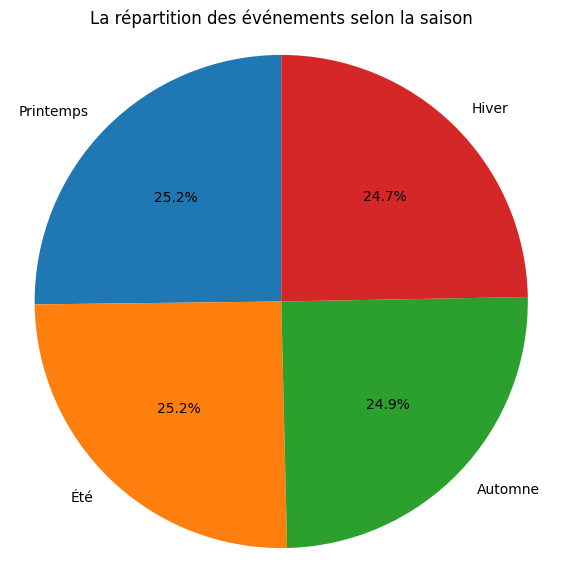

In [30]:
season_pie_chart(Season, "Événements")


**Analyse univariée – Variables catégorielles (table saison)**


La répartition des événements selon la saison est globalement équilibrée, avec des proportions similaires pour chaque saison. Cette uniformité suggère l’absence de saison dominante dans les données et indique que la variable saison pourra être exploitée principalement dans des analyses bivariées, plutôt qu’en univarié.

The distribution of events by season is generally balanced, with similar proportions for each season. This uniformity suggests the absence of a dominant season in the data and indicates that the season variable will be mainly useful for bivariate analyses rather than univariate ones.

**2.1 ANALYSE BIVARIÉE** (relations entre variables)


* Aucune analyse Numérique vs Numérique n’a été réalisée, car les tables ne contiennent pas deux variables numériques pertinentes pouvant être comparées. Les identifiants ont été exclus de l’analyse car ils ne portent pas d’information statistique

  No Numeric vs. Numeric analysis was performed, as the tables do not contain two relevant numeric variables that can be compared. Identifiers were excluded from the analysis because they do not carry any statistical information.

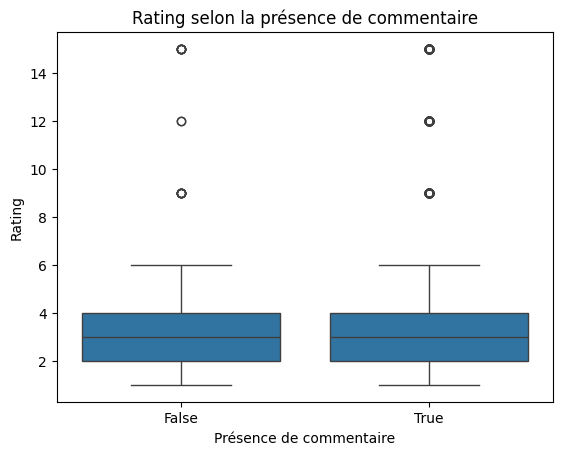

In [31]:
evaluation['has_comment'] = evaluation['comment'].notna()

sns.boxplot(x='has_comment', y='rating', data=evaluation)
plt.title("Rating selon la présence de commentaire")
plt.xlabel("Présence de commentaire")
plt.ylabel("Rating")
plt.show()

**Interprétation — Rating selon la présence de commentaire**

Le boxplot met en évidence une différence dans la distribution des notes selon la présence d’un commentaire.
Les évaluations accompagnées d’un commentaire présentent une plus grande variabilité des notes, avec une concentration aussi bien sur des valeurs faibles que sur des valeurs élevées.
À l’inverse, les évaluations sans commentaire sont moins dispersées et se situent principalement autour de notes intermédiaires.
Cela suggère que les bénéficiaires sont davantage enclins à laisser un commentaire lorsqu’ils ont une expérience particulièrement positive ou négative.

The boxplot highlights a difference in the distribution of ratings depending on whether a comment is present.
Ratings accompanied by a comment show greater variability, with concentrations on both low and high values.
In contrast, ratings without a comment are less dispersed and are mainly centered around intermediate values.
This suggests that beneficiaries are more likely to leave a comment when they have had a particularly positive or negative experience.

Le graphique montre une absence de relation (indépendance) entre le rating et la présence de commentaire. Les deux boîtes à moustaches sont parfaitement superposables, ce qui indique que la distribution des notes est identique, que l'utilisateur ait rédigé un commentaire ou non. La présence d'un commentaire n'influence donc pas la note attribuée.


The chart shows no relationship (independence) between the rating and the presence of a comment. The two boxplots are perfectly overlapping, indicating that the distribution of ratings is identical whether or not the user has written a comment. Therefore, the presence of a comment does not influence the rating given.

In [32]:
Season['event_date'] = pd.to_datetime(Season['event_date'])
Season['year'] = Season['event_date'].dt.year

contingency = pd.crosstab(Season['year'], Season['saison'])
contingency


saison  Automne  Hiver  Printemps  Été
year                                  
2022         91     90         92   92
2023         91     90         92   92
2024         91     91         92   92
2025         91     90         92   92

**Interprétation du tableau de contingence**

Le tableau de contingence présente les effectifs d’événements pour chaque combinaison année–saison. On observe que, pour chaque année, le nombre d’événements par saison est quasi identique (valeurs très proches entre Automne, Hiver, Printemps et Été).

Cette homogénéité des effectifs indique que la variable saison est répartie de manière stable d’une année à l’autre. Le tableau ne met donc pas en évidence de déséquilibre ni de concentration particulière des événements selon l’année ou la saison.


The contingency table shows the counts of events for each year–season combination. It can be observed that, for each year, the number of events per season is nearly identical (values are very close across Autumn, Winter, Spring, and Summer).

This uniformity in counts indicates that the season variable is consistently distributed from one year to another. Therefore, the table does not reveal any imbalance or particular concentration of events by year or season.

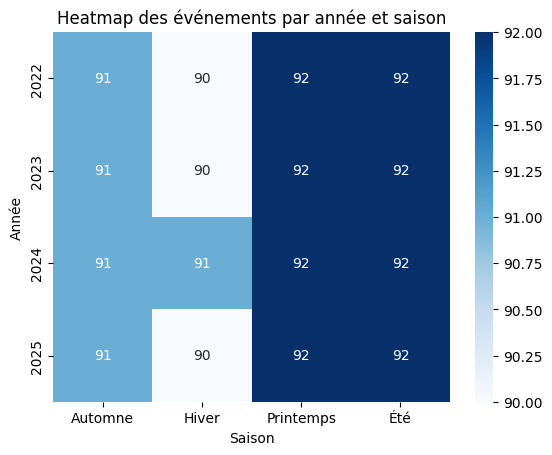

In [33]:
sns.heatmap(contingency, annot=True, cmap="Blues")
plt.title("Heatmap des événements par année et saison")
plt.xlabel("Saison")
plt.ylabel("Année")
plt.show()


**Interprétation**:
La heatmap, qui est une représentation graphique du tableau de contingence, confirme visuellement cette observation. Les couleurs sont très similaires pour l’ensemble des cellules, traduisant une répartition uniforme des événements selon les saisons et les années.

L’absence de contraste marqué dans la heatmap suggère qu’il n’existe pas de relation significative entre l’année et la saison. Autrement dit, la saisonnalité des événements ne varie pas en fonction de l’année.




The heatmap, which is a graphical representation of the contingency table, visually confirms this observation. The colors are very similar across all cells, reflecting a uniform distribution of events across seasons and years.

The lack of pronounced contrast in the heatmap suggests that there is no significant relationship between year and season. In other words, the seasonality of events does not vary depending on the year

<h1>Table lieu</h1>

In [34]:
df_loc.dtypes

Code_Postal          int64
Local               object
Ville               object
Adresse_Complete    object
Pays                object
dtype: object

<h3 style="color:red">cette table contient uniquement des colonnes catégorielles <h3>

<h3 style="color:red">This table contains only categorical columns</h3>


In [35]:
# Compter le nombre de valeurs manquantes par colonne
null_counts = df_loc.isnull().sum()

# Afficher le résultat
print("Nombre de valeurs nulles par colonne :")
print(null_counts)


Nombre de valeurs nulles par colonne :
Code_Postal         0
Local               0
Ville               0
Adresse_Complete    0
Pays                0
dtype: int64


<h3 style="color:red">pas de valeurs nulles </h3>

<h3 style="color:red">no null values</h3>

In [36]:
df_loc.duplicated().sum()


np.int64(0)

<h3 style="color:red">Absence de doublons </h3>

<h3 style="color:red">No duplicates</h3>


/tmp/ipython-input-2037755863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


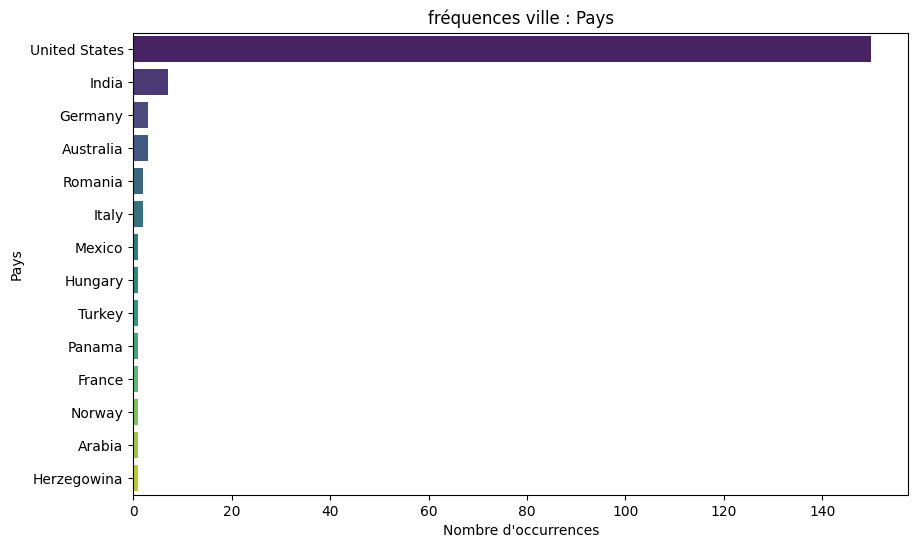

In [37]:

# --- ANALYSE DES VARIABLES CATÉGORIELLES ---

# Liste des colonnes textuelles à analyser
cols_to_plot = ['Pays'] # Tu peux ajouter 'Code Postal' si nécessaire

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    # On prend les 15 occurrences les plus fréquentes pour garder le graphique lisible
    top_locations = df_loc[col].value_counts().head(15)

    sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')

    plt.title(f'fréquences ville : {col}')
    plt.xlabel('Nombre d\'occurrences')
    plt.ylabel(col)
    plt.show()

# --- ANALYSE DE LA COMPLÉTUDE (Valeurs manquantes) ---



# --- DISTRIBUTION DES CODES POSTAUX (Si traités comme numériques) ---
# Note : Les codes postaux sont souvent mieux analysés comme des chaînes de caractères,
# mais voici comment voir leur répartition s'ils sont convertis en nombre.



<h3>Le graphique met en évidence une hyper-concentration des données aux États-Unis, qui s'imposent comme le pôle ultra-dominant avec environ 150 occurrences. Cette distribution est caractéristique d'un phénomène de « longue traîne » (Long Tail) : après un écart massif avec l'Inde, deuxième pays du classement, le reste de l'échantillon se fragmente en une multitude de contributions marginales provenant principalement d'Europe (Allemagne, Italie, France) et d'Océanie. Cette configuration suggère soit une forte spécialisation du service sur le marché nord-américain, soit une phase de démarrage précoce à l'échelle internationale, où la visibilité globale est réelle mais encore dépourvue de masse critique en dehors de son foyer principal.</h3>


<h3>The chart highlights a strong concentration of data in the United States, which stands out as the overwhelmingly dominant hub with around 150 occurrences. This distribution is characteristic of a "long tail" phenomenon: after a massive gap with India, the second-ranked country, the rest of the sample is fragmented into numerous marginal contributions, mainly from Europe (Germany, Italy, France) and Oceania. This pattern suggests either a strong specialization of the service in the North American market or an early international launch phase, where global visibility exists but has not yet reached critical mass outside its main base.</h3>


/tmp/ipython-input-3054598469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_local.index, y=top_local.values, palette='viridis')


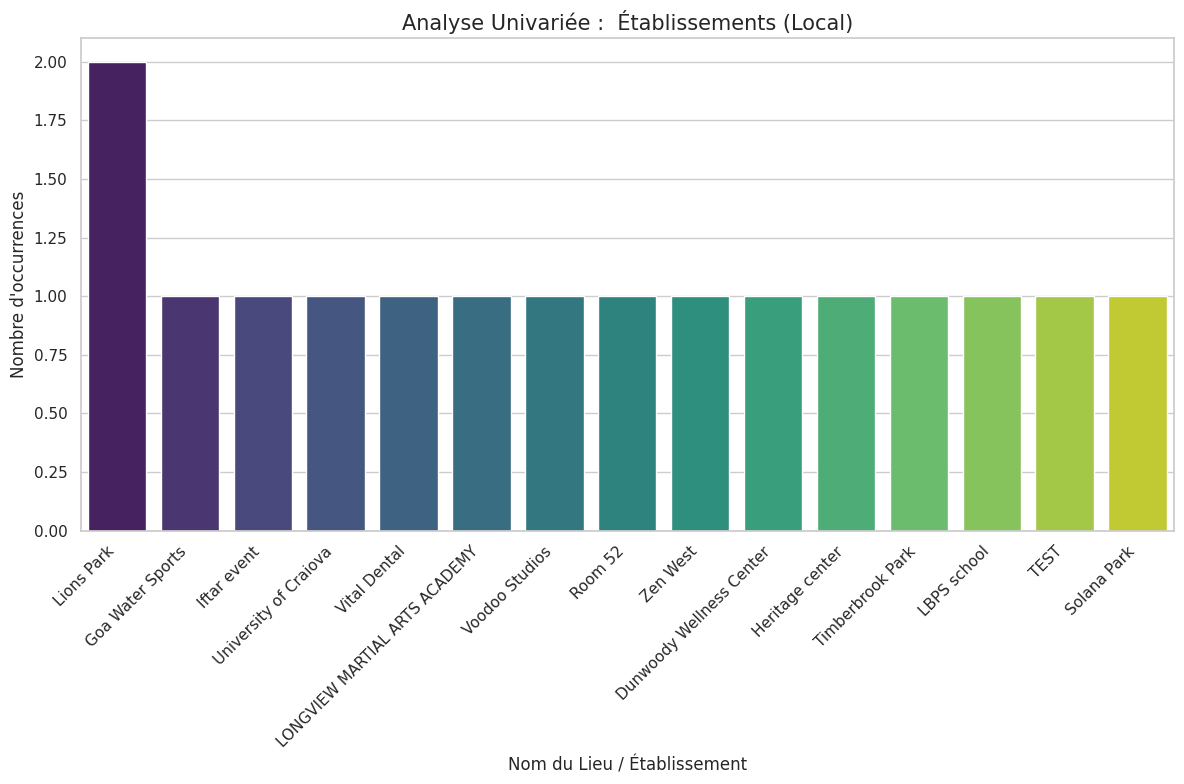

In [38]:


# 1. Chargement (séparateur point-virgule)


# Configuration du style
sns.set_theme(style="whitegrid")

# --- ANALYSE UNIVARIÉE : COLONNE 'Local' ---
plt.figure(figsize=(12, 8))

# On extrait les 15 établissements les plus fréquents
# (Utile pour voir si certains lieux reviennent plusieurs fois)
top_local = df_loc['Local'].value_counts().head(15)

# Création du barplot vertical
sns.barplot(x=top_local.index, y=top_local.values, palette='viridis')

# Personnalisation des axes et titres
plt.title('Analyse Univariée :  Établissements (Local)', fontsize=15)
plt.xlabel('Nom du Lieu / Établissement', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)

# Rotation des noms pour qu'ils soient lisibles
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# --- PETIT RÉSUMÉ STATISTIQUE ---


<h3>La variable présente une distribution quasi-uniforme à forte cardinalité, ce qui traduit une absence de classe modale et une grande dispersion des données locales.</h3>


<h3>The variable exhibits an almost uniform distribution with high cardinality, indicating the absence of a modal class and a wide dispersion of local data.</h3>


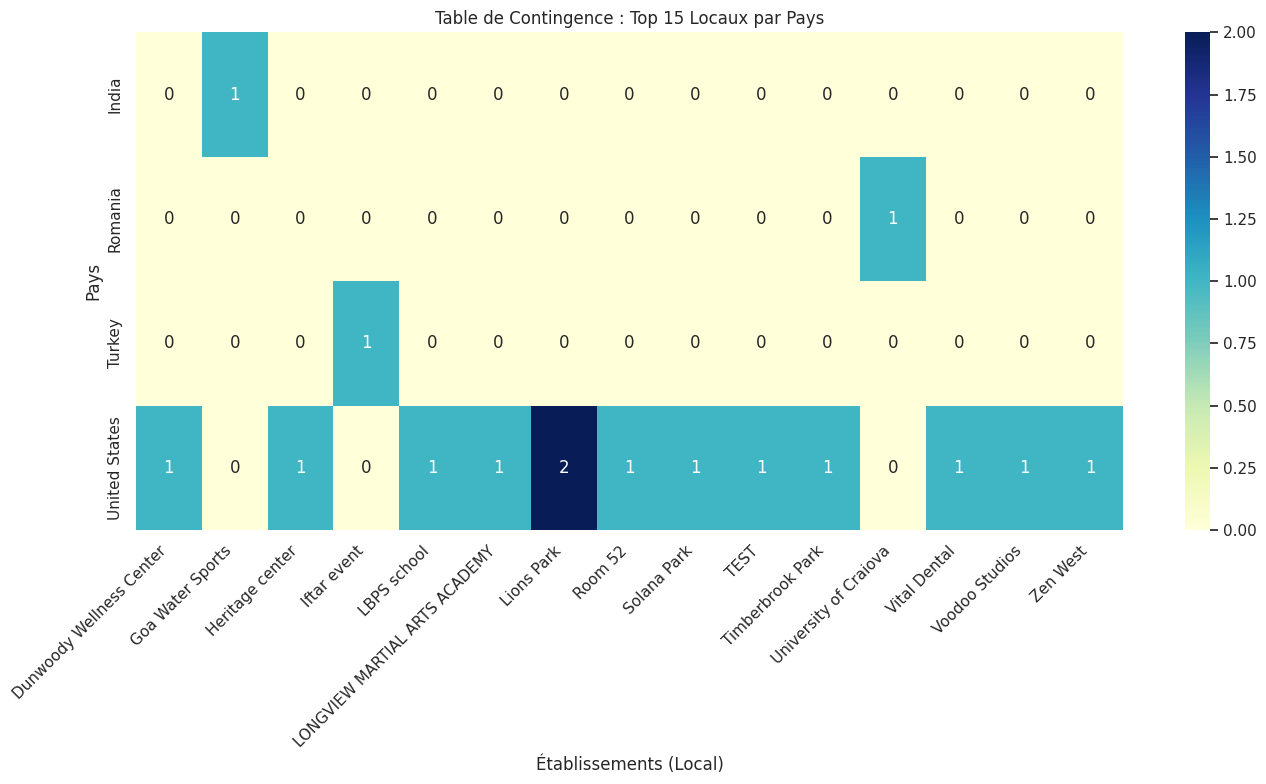

Table de contingence (Extraits) :


Local          Dunwoody Wellness Center  Goa Water Sports  Heritage center  \
Pays                                                                         
India                                 0                 1                0   
Romania                               0                 0                0   
Turkey                                0                 0                0   
United States                         1                 0                1   

Local          Iftar event  LBPS school  LONGVIEW MARTIAL ARTS ACADEMY  \
Pays                                                                     
India                    0            0                              0   
Romania                  0            0                              0   
Turkey                   1            0                              0   
United States            0            1                              1   

Local          Lions Park  Room 52  Solana Park  TEST  Timberbrook Park  \
Pays                                                                      
India                   0        0            0     0                 0   
Romania                 0        0            0     0                 0   
Turkey                  0        0            0     0                 0   
United States           2        1            1     1                 1   

Local          University of Craiova  Vital Dental  Voodoo Studios  Zen West  
Pays                                                                          
India                              0             0               0         0  
Romania                            1             0               0         0  
Turkey                             0             0               0         0  
United States                      0             1               1         1

In [39]:

top_15_locaux = df_loc['Local'].value_counts().nlargest(15).index

# 2. Filtrer le dataset pour ne garder que ces 15 locaux
df_top = df_loc[df_loc['Local'].isin(top_15_locaux)]

# 3. Créer la table de contingence (Analyse bivariée)
# On croise les Pays et les Locaux
table_contingence = pd.crosstab(df_top['Pays'], df_top['Local'])

# 4. Affichage de la Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(table_contingence,
            annot=True,          # Affiche les nombres dans les cases
            fmt="d",             # Format entier pour les nombres
            cmap="YlGnBu",       # Palette de couleurs claire (jaune à bleu)
            cbar=True)           # Affiche la barre d'échelle

plt.title('Table de Contingence : Top 15 Locaux par Pays')
plt.xlabel('Établissements (Local)')
plt.ylabel('Pays')
plt.xticks(rotation=45, ha='right') # Incliner les noms des locaux pour la lecture
plt.tight_layout()
plt.show()

# Optionnel : Afficher la table brute
print("Table de contingence (Extraits) :")
display(table_contingence)

<h3>On observe que la grande majorité des établissements du "Top 15" sont exclusivement rattachés aux United States <br/>
La table de contingence révèle une forte relation de dépendance entre les deux variables. Visuellement, cette relation se traduit par une structure diagonale où chaque établissement est exclusif à un pays</h3>

<h3>It can be observed that the vast majority of "Top 15" establishments are exclusively linked to the United States.<br/>
The contingency table reveals a strong dependency between the two variables. Visually, this relationship appears as a diagonal structure, where each establishment is exclusive to a single country.</h3>



<h1>Table visitors</h1>

In [40]:
df_visitors.dtypes

id                       int64
date            datetime64[ns]
visitors                 int64
reservations             int64
dtype: object

<h3 style="color:red">contient des colonnes numériques et une colonne date</h3>

<h3 style="color:red">contains numeric columns and a date column</h3>


In [41]:
print(df_visitors.isnull().sum())

id              0
date            0
visitors        0
reservations    0
dtype: int64


<h3 style="color:red">Absence de valeurs nulles</h3>

<h3 style="color:red">No null values</h3>


In [42]:
nombre_doublons = df_visitors.duplicated().sum()
print(f"Il y a {nombre_doublons} lignes en double.")

Il y a 0 lignes en double.


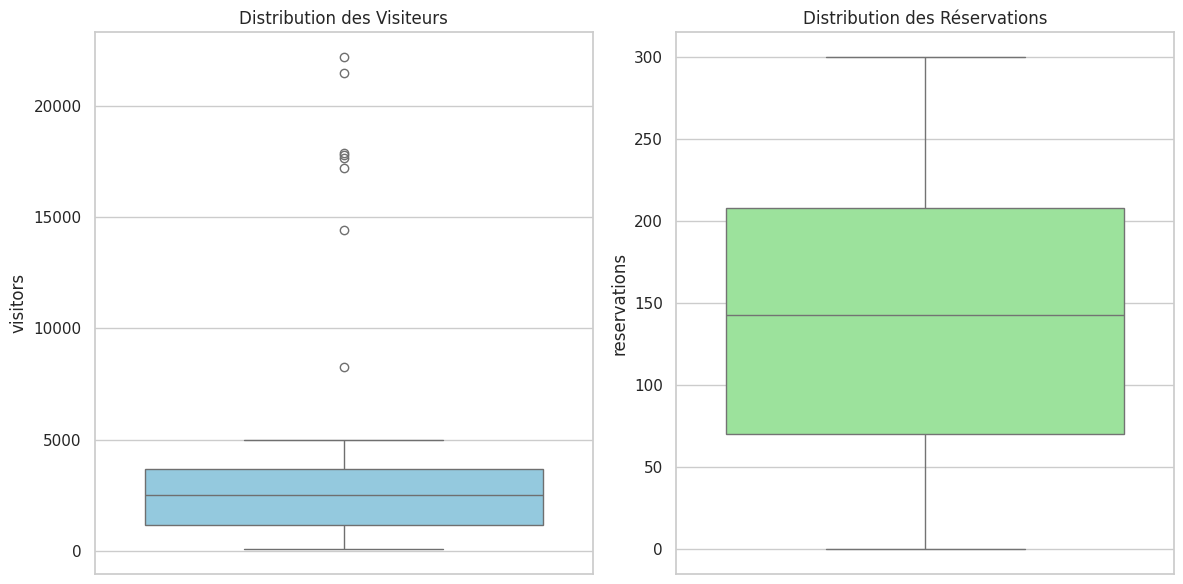

In [43]:
plt.figure(figsize=(12, 6))

# Boxplot pour les Visiteurs
plt.subplot(1, 2, 1)
sns.boxplot(y=df_visitors['visitors'], color='skyblue')
plt.title('Distribution des Visiteurs')

# Boxplot pour les Réservations
plt.subplot(1, 2, 2)
sns.boxplot(y=df_visitors['reservations'], color='lightgreen')
plt.title('Distribution des Réservations')

plt.tight_layout()
plt.show()

On observe de nombreuses valeurs aberrantes extrêmes (entre 8 000 et 22 000 visiteurs). Cela indique que quelques événements exceptionnels génèrent un trafic hors norme par rapport à la performance habituelle.Donc ces valeurs sont valides et on se doit de les garder.

We observe numerous extreme outliers (between 8,000 and 22,000 visitors). This indicates that a few exceptional events generate traffic far beyond the usual performance. Therefore, these values are valid and should be retained.

<h3>1.Analyse univariée (conolonnes numétiques)</h3>

           visitors  reservations
count    365.000000    365.000000
mean    2784.073973    143.989041
std     2641.682349     83.194033
min       58.000000      0.000000
25%     1141.000000     70.000000
50%     2505.000000    143.000000
75%     3679.000000    208.000000
max    22215.000000    300.000000


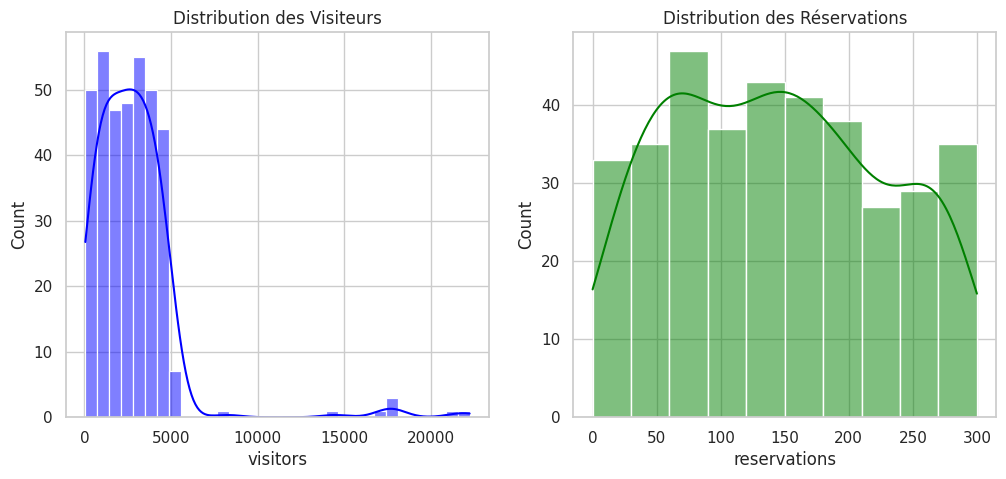

In [44]:
#Statistiques descriptives (Moyenne, Min, Max, etc.)
print(df_visitors[['visitors', 'reservations']].describe())

# Visualisation de la distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_visitors['visitors'], kde=True, color='blue')
plt.title('Distribution des Visiteurs')

plt.subplot(1, 2, 2)
sns.histplot(df_visitors['reservations'], kde=True, color='green')
plt.title('Distribution des Réservations')

plt.show()

<h3 style="color:blue">Distribution des Visiteurs (Graphique Bleu)<br/>
Forme : La distribution est asymétrique à droite (positive skew).<br/>


Anomalies (Outliers) : On remarque des barres isolées à l'extrême droite (entre 15 000 et 22 215 visiteurs).<br/> Ce sont des pics de trafic exceptionnels (événements spéciaux, promotions ou soldes) qui tirent la moyenne vers le haut.</h3>
<br/>
<h3 style="color:green">Distribution des Réservations (Graphique Vert)<br/>
Forme : La distribution est beaucoup plus uniforme et équilibrée.<br/>

Observation : Il n'y a pas de concentration extrême. Les réservations sont bien réparties sur toute la plage (de 0 à 300).<br/>

Stabilité : Le système de réservation semble avoir une "capacité limite" (le maximum plafonne à 300), ce qui explique pourquoi on ne voit pas de pics extrêmes comme pour les visiteurs.</h3>

<h3 style="color:blue">Visitor Distribution (Blue Chart)<br/>
Shape: The distribution is right-skewed (positive skew).<br/>

Anomalies (Outliers): Isolated bars are observed at the far right (between 15,000 and 22,215 visitors).<br/> These represent exceptional traffic spikes (special events, promotions, or sales) that pull the mean upward.</h3>
<br/>
<h3 style="color:green">Reservation Distribution (Green Chart)<br/>
Shape: The distribution is much more uniform and balanced.<br/>

Observation: There is no extreme concentration. Reservations are well distributed across the entire range (from 0 to 300).<br/>

Stability: The reservation system appears to have a "capacity limit" (the maximum caps at 300), which explains why no extreme spikes are seen, unlike the visitor distribution.</h3>


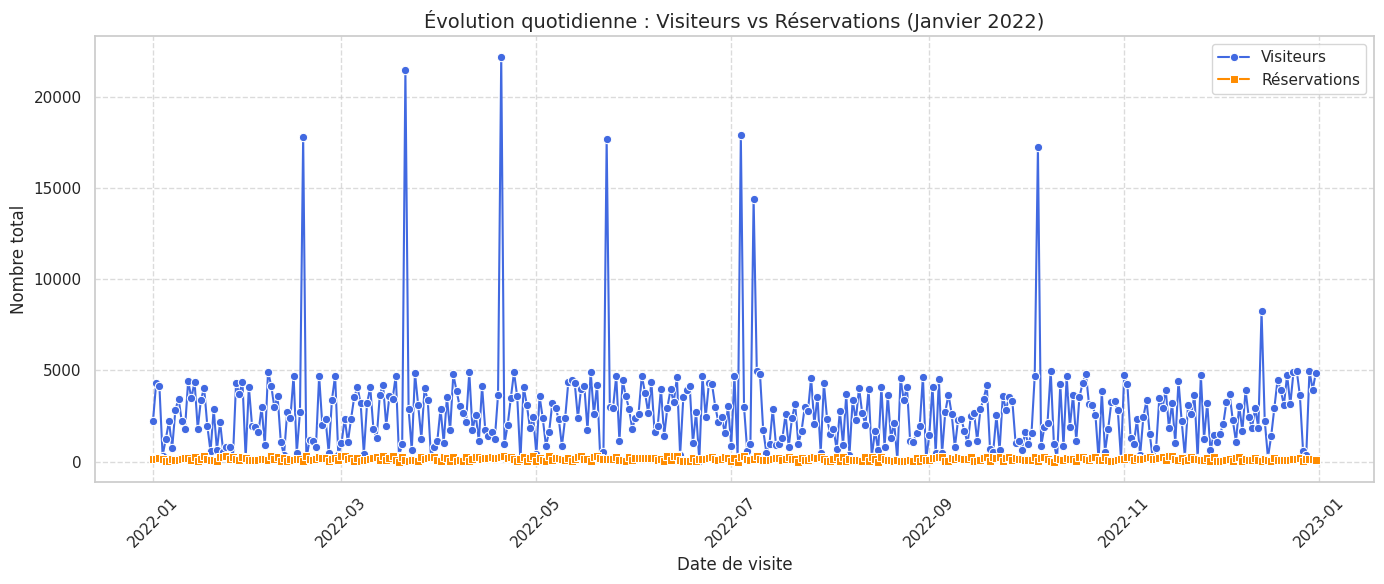

In [45]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'])

# 2. Trier les données par date (très important pour un Line Plot)
df_visitors = df_visitors.sort_values('date')

# 3. Création du graphique
plt.figure(figsize=(14, 6))

# Tracer les visiteurs
sns.lineplot(x='date', y='visitors', data=df_visitors, label='Visiteurs', marker='o', color='royalblue')

# Tracer les réservations sur le même graphique pour comparer
sns.lineplot(x='date', y='reservations', data=df_visitors, label='Réservations', marker='s', color='darkorange')

# Personnalisation
plt.title('Évolution quotidienne : Visiteurs vs Réservations (Janvier 2022)', fontsize=14)
plt.xlabel('Date de visite', fontsize=12)
plt.ylabel('Nombre total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Améliorer l'affichage des dates sur l'axe X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h3 style="color:blue">Ce graphique montre une décorrélation nette entre un trafic de visiteurs très instable, marqué par des pics de fréquentation massifs et ponctuels, et un nombre de réservations qui reste quasi nul et stagnant tout au long de l'année 2022.</h3>

<h3 style="color:blue">This chart shows a clear decoupling between highly unstable visitor traffic, marked by massive and sporadic attendance spikes, and a number of reservations that remains almost zero and stagnant throughout the year 2022.</h3>


<h3>2.Analyse bivariée</h3>

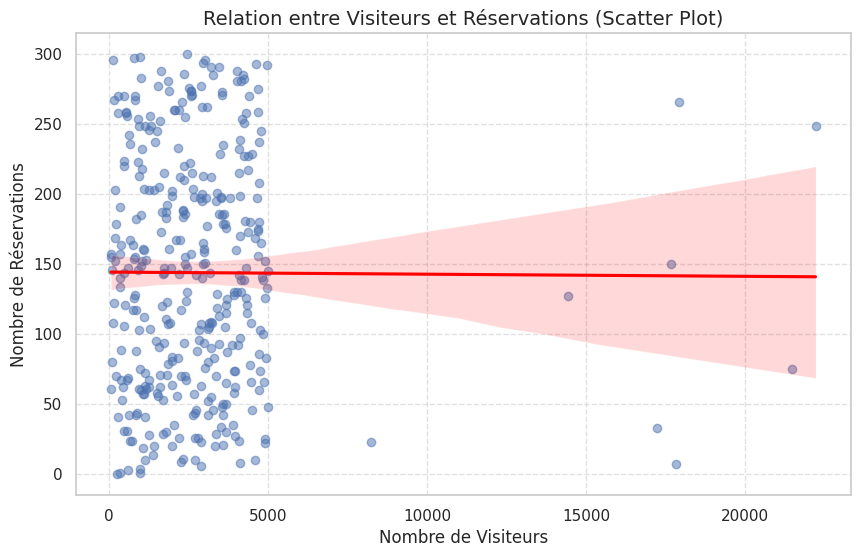

Coefficient de corrélation de Spearman : 0.020


In [46]:
plt.figure(figsize=(10, 6))
sns.regplot(x='visitors', y='reservations', data=df_visitors,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relation entre Visiteurs et Réservations (Scatter Plot)', fontsize=14)
plt.xlabel('Nombre de Visiteurs')
plt.ylabel('Nombre de Réservations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Calcul du coefficient de corrélation de Spearman
corr_spearman, p_value = spearmanr(df_visitors['visitors'], df_visitors['reservations'])

print(f"Coefficient de corrélation de Spearman : {corr_spearman:.3f}")

<h3>Pas de relation entre les deux colonnes</h3>
Un score de $0,020$ signifie qu'il n'y a pratiquement aucune relation statistique
La grande majorité des données est concentrée entre 0 et 5 000 visiteurs sans tendance réelle, tandis que les points extrêmes (outliers) à droite du graphique n'élèvent pas le niveau de réservations

<h1>Table Marketing-Spend</h1>

In [47]:
df_spend.dtypes

id                    int64
month                object
marketing_spend       int64
new_beneficiaries     int64
spend_type           object
dtype: object

<h3 style="color:red">on a 2 colones categorielles et 2 colonnes numériques</h3>

<h3 style="color:red">we have 2 categorical columns and 2 numeric columns</h3>


In [48]:
print(df_spend.isnull().sum())

id                   0
month                0
marketing_spend      0
new_beneficiaries    0
spend_type           0
dtype: int64


<h3 style="color:red">Absence de valeurs manquantes</h3>

<h3 style="color:red">No missing values</h3>


In [49]:
nombre_doublons = df_spend.duplicated().sum()
print(f"Il y a {nombre_doublons} lignes en double.")

Il y a 0 lignes en double.


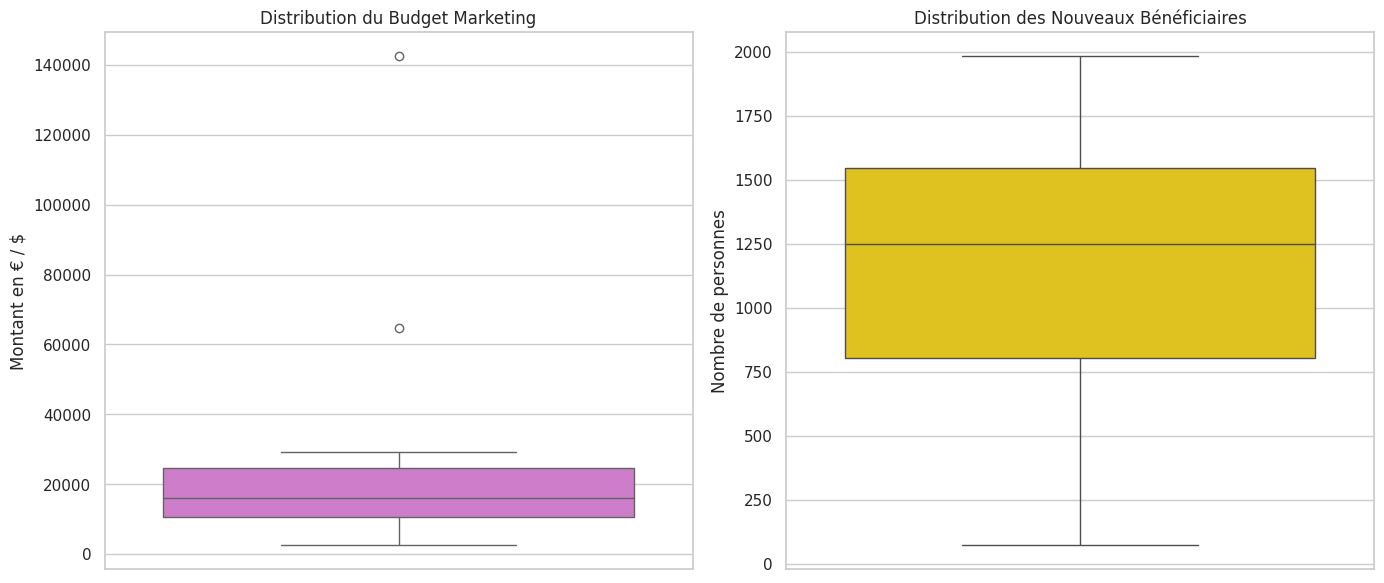

In [50]:
# Création de la figure
plt.figure(figsize=(14, 6))

# Boxplot pour les dépenses marketing (Marketing Spend)
plt.subplot(1, 2, 1)
sns.boxplot(y=df_spend['marketing_spend'], color='orchid')
plt.title('Distribution du Budget Marketing')
plt.ylabel('Montant en € / $')

# Boxplot pour les nouveaux bénéficiaires (New Beneficiaries)
plt.subplot(1, 2, 2)
sns.boxplot(y=df_spend['new_beneficiaries'], color='gold')
plt.title('Distribution des Nouveaux Bénéficiaires')
plt.ylabel('Nombre de personnes')

plt.tight_layout()
plt.show()

<h3 style="color:red">on a quelques valeurs abeerantes dans marketing spend, mais ce ne sont pas des valeurs incorrectes, elles sont dues a un budget élevé de marketing<br/>
d'ou la segmentation en categories: expensive,normal,cheap</h3>

<h3 style="color:red">There are a few outliers in marketing spend, but these are not incorrect values; they are due to a high marketing budget.<br/>
Hence the segmentation into categories: expensive, normal, cheap.</h3>


<h3>1.Analyse univariée (numeriques)</h3>

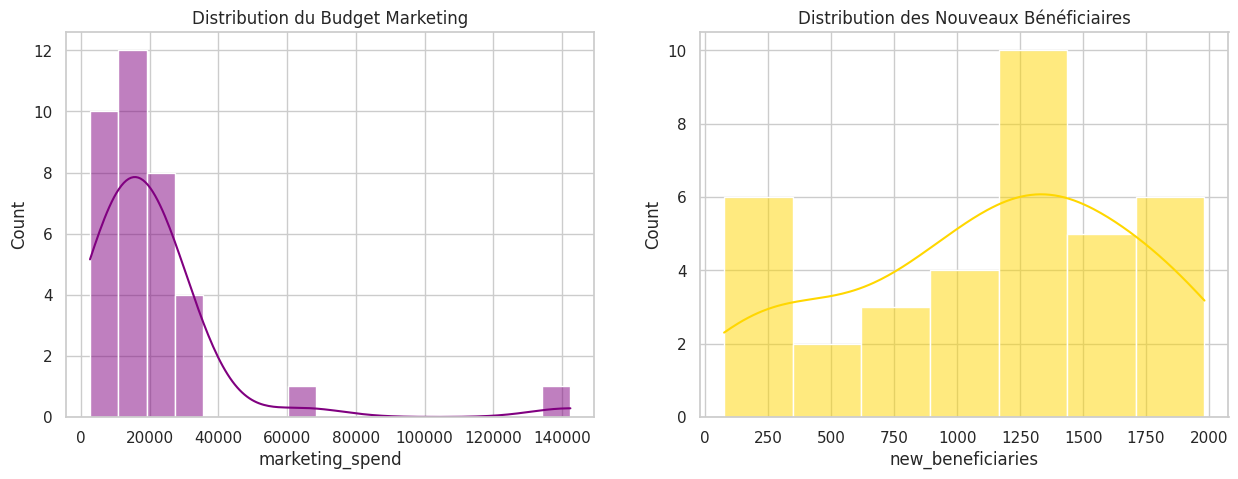

In [51]:
plt.figure(figsize=(15, 5))

# Histogramme Marketing Spend
plt.subplot(1, 2, 1)
sns.histplot(df_spend['marketing_spend'], kde=True, color='purple')
plt.title('Distribution du Budget Marketing')

# Histogramme New Beneficiaries
plt.subplot(1, 2, 2)
sns.histplot(df_spend['new_beneficiaries'], kde=True, color='gold')
plt.title('Distribution des Nouveaux Bénéficiaires')

plt.show()

<h3>graphiaque budget Marketing : Asymetrie a droite<br/>
L'histogramme du budget marketing présente une asymétrie à droite (skewed right) prononcée, où la majorité des observations sont regroupées dans les tranches de faibles montants tandis que quelques valeurs isolées étirent la queue de distribution vers la droite.</h3>

<h3>Marketing Budget Chart: Right Skew<br/>
The histogram of the marketing budget shows a pronounced right skew, where the majority of observations are clustered in the lower ranges, while a few isolated values stretch the tail of the distribution to the right.</h3>


/tmp/ipython-input-1361355444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marketing_spend', data=df_spend, palette='viridis')


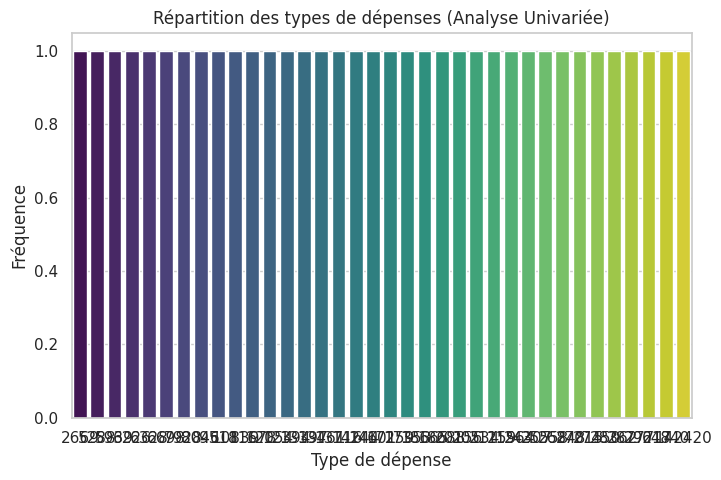

In [52]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

# Création du barplot (comptage automatique des catégories)
sns.countplot(x='marketing_spend', data=df_spend, palette='viridis')

# Personnalisation
plt.title('Répartition des types de dépenses (Analyse Univariée)')
plt.xlabel('Type de dépense')
plt.ylabel('Fréquence')

plt.show()

<h3>Le graphique indique que la stratégie de dépense la plus courante au sein de l'organisation est le niveau "normal".</h3>

<h3>3.Analyse bivariée</h3>

/tmp/ipython-input-4023025795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='spend_type', y='new_beneficiaries', data=df_spend, palette='Set2')


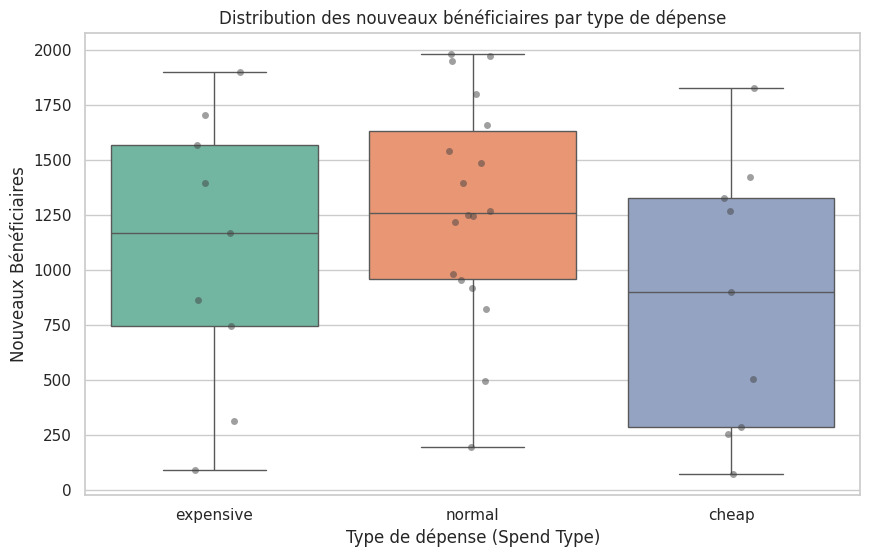

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Création du boxplot
# On compare ici le type de dépense avec le nombre de nouveaux bénéficiaires
sns.boxplot(x='spend_type', y='new_beneficiaries', data=df_spend, palette='Set2')

# Ajout d'un "swarmplot" par-dessus pour voir les points individuels (optionnel mais recommandé pour les petits datasets)
sns.stripplot(x='spend_type', y='new_beneficiaries', data=df_spend, color=".25", alpha=0.5)

# Personnalisation des titres
plt.title('Distribution des nouveaux bénéficiaires par type de dépense')
plt.xlabel('Type de dépense (Spend Type)')
plt.ylabel('Nouveaux Bénéficiaires')

plt.show()

<h3>L'analyse par boxplot révèle que les dépenses de type "normal" offrent paradoxalement la meilleure performance médiane en termes de nouveaux bénéficiaires, tandis que les dépenses "expensive" ne garantissent pas de meilleurs résultats et présentent une dispersion similaire à la catégorie "cheap"</h3>

<h3>il existe une relation modérée, mais elle n'est pas linéaire : l'augmentation du budget améliore les résultats jusqu'à un certain point, après quoi l'efficacité stagne</h3>

<h3>Boxplot analysis reveals that "normal" spending paradoxically delivers the best median performance in terms of new beneficiaries, while "expensive" spending does not guarantee better results and shows a dispersion similar to the "cheap" category.</h3>


<h3>There is a moderate relationship, but it is not linear: increasing the budget improves results up to a certain point, after which efficiency plateaus.</h3>


<h1>Table service</h1>

In [54]:
df_service.dtypes

id_service          int64
price             float64
description        object
id_provider         int64
id_subcategory      int64
title              object
dtype: object

In [55]:
df_service.shape


(2500, 6)

In [56]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_service      2500 non-null   int64  
 1   price           2286 non-null   float64
 2   description     2500 non-null   object 
 3   id_provider     2500 non-null   int64  
 4   id_subcategory  2500 non-null   int64  
 5   title           2151 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 117.3+ KB


In [57]:
df_service.isnull().sum()


id_service          0
price             214
description         0
id_provider         0
id_subcategory      0
title             349
dtype: int64

<h3 style="color:red">La colonne price contient des valeurs nulles</h3>

<h3 style="color:red">The price column contains null values</h3>


In [58]:
df_service.duplicated().sum()


np.int64(0)

In [59]:
df_service.nunique()


id_service        2500
price             1992
description       2500
id_provider        764
id_subcategory       4
title               86
dtype: int64

In [60]:
df_num = df_service.select_dtypes(include=[ "float64"])

# Statistiques descriptives
desc_numeric = df_num.describe().T
print(desc_numeric)

        count         mean         std    min      25%     50%     75%  \
price  2286.0  5273.018373  8232.55011  206.0  2127.25  4165.5  6187.0   

           max  
price  79300.0  


<h3 style="color:red">Les descriptions sont majoritairement uniques, tandis que les titres présentent des motifs répétitifs</h3>

<h3 style="color:red">=>Descriptions are mostly unique, while titles show repeated patterns.</h3>

<h3>Analyse univariee</h3>

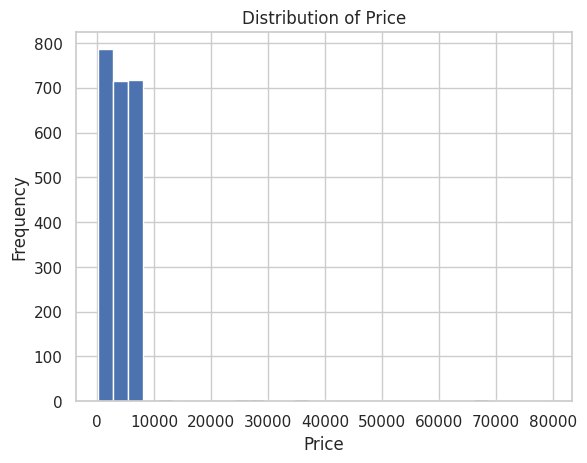

In [61]:

df_service["price"].dropna().hist(bins=30)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


<h3 style='color:red'>The price distribution is highly right-skewed. Most services are priced at low values, while a small number of services have very high prices, creating</h3>

<h3 style='color:red'>La distribution des prix est fortement asymétrique à droite. La plupart des services sont proposés à des prix bas, tandis qu'un petit nombre de services affichent des prix très élevés, créant ainsi une longue queue de distribution à droite.</h3>

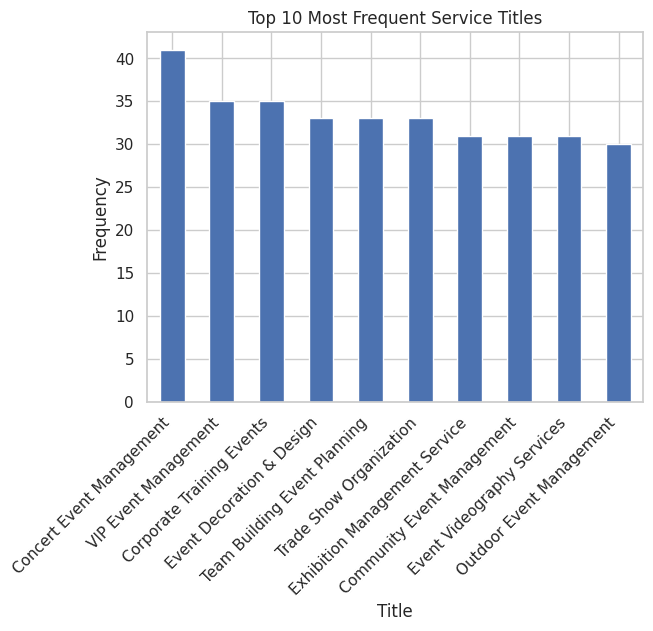

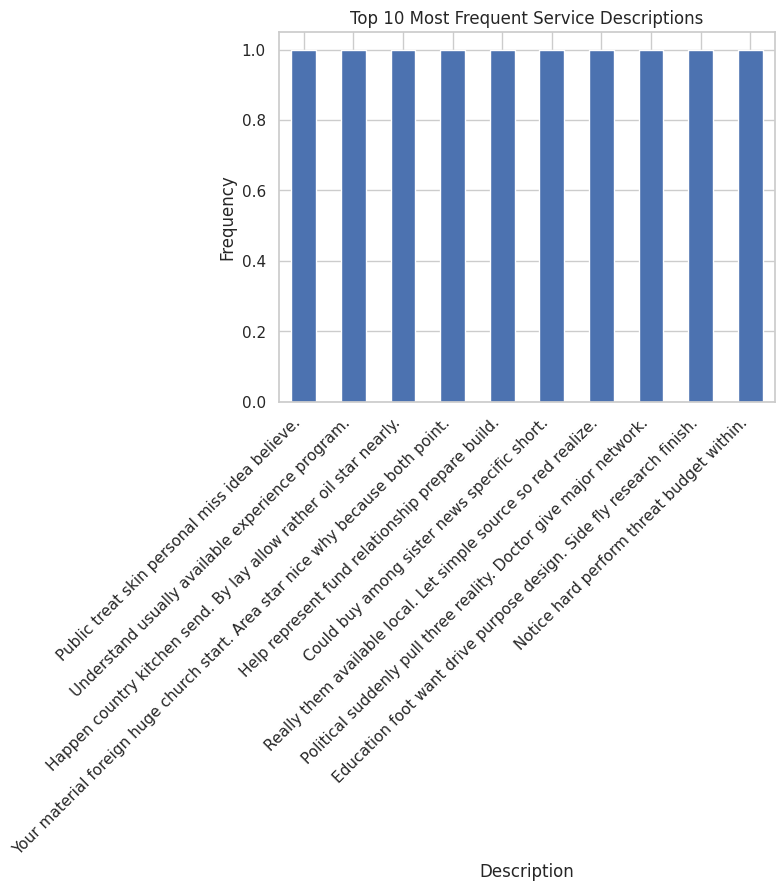

In [62]:
df_service["title"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Frequent Service Titles")
plt.xlabel("Title")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

# 🔹 Bar plot for DESCRIPTION
df_service["description"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Frequent Service Descriptions")
plt.xlabel("Description")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


<h3 style="color:red">Barplot – Service Titles

The barplot shows that a limited number of service titles appear very frequently.
This indicates standardized service offerings, where multiple providers use the same titles for similar services.

 Barplot – Service Descriptions

The barplot shows very low frequencies (mostly equal to 1).
This indicates that service descriptions are mostly unique, suggesting customized or provider-specific descriptions rather than reused text.</h3>

<h3> Diagramme à barres – Intitulés des services

Le diagramme à barres montre qu'un nombre limité d'intitulés de services apparaissent très fréquemment.

Ceci indique des offres de services standardisées, où plusieurs prestataires utilisent les mêmes intitulés pour des services similaires.

Diagramme à barres – Descriptions des services

Le diagramme à barres présente des fréquences très faibles (principalement égales à 1).

Cela indique que les descriptions de services sont majoritairement uniques, suggérant des descriptions personnalisées ou spécifiques au prestataire plutôt que du texte réutilisé.</h3>

<h3>Bivariate Analysis</h3>

<Figure size 1000x500 with 0 Axes>

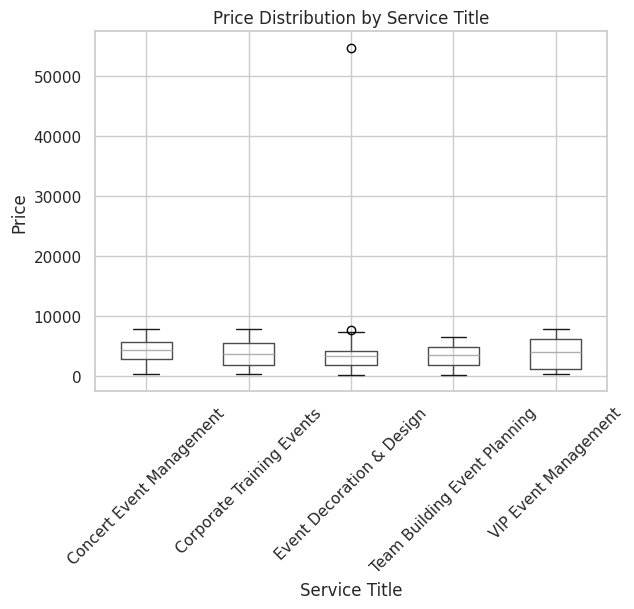

In [63]:
top_titles = df_service["title"].value_counts().head(5).index
df_top = df_service[df_service["title"].isin(top_titles)]

plt.figure(figsize=(10,5))
df_top.boxplot(column="price", by="title", rot=45)
plt.title("Price Distribution by Service Title")
plt.suptitle("")
plt.xlabel("Service Title")
plt.ylabel("Price")
plt.show()

Le diagramme en boîte révèle des différences de prix notables selon les intitulés de services.

La gestion d'événements VIP et la gestion de concerts affichent des prix médians plus élevés, ce qui indique un positionnement haut de gamme.

La décoration et la conception d'événements présentent une forte variabilité de prix et des valeurs aberrantes extrêmes, suggérant une tarification hétérogène et des offres très haut de gamme.

Globalement, les stratégies de tarification varient considérablement selon le type de service.

<h1>Table category</h1>

In [64]:
print("CATEGORY shape:", df_category.shape)

CATEGORY shape: (37, 2)


In [65]:
print("\nCATEGORY unique values:\n", df_category.nunique())


CATEGORY unique values:
 id_category      37
category_name    37
dtype: int64


In [66]:
print("CATEGORY duplicated rows:", df_category.duplicated().sum())


CATEGORY duplicated rows: 0


In [67]:
print("SUBCATEGORY shape:", df_subcategory.shape)


SUBCATEGORY shape: (4, 3)


In [68]:
print("\nSUBCATEGORY unique values:\n", df_subcategory.nunique())



SUBCATEGORY unique values:
 id_subcategory    4
name              4
id_category       3
dtype: int64


In [69]:
print("\nSUBCATEGORY null values:\n", df_subcategory.isnull().sum())



SUBCATEGORY null values:
 id_subcategory    0
name              0
id_category       0
dtype: int64


<h3 style="color:red">no null values</h3>

<h3 style="color:red">pas de valeurs nulles</h3>

In [70]:
print("SUBCATEGORY duplicated rows:", df_subcategory.duplicated().sum())


SUBCATEGORY duplicated rows: 0


In [71]:
df_provider.head()


id_provider                     name service_type  \
0            1             Cooper-Lloyd   Decoration   
1            2  Andrews, Hart and Smith   Decoration   
2            3            Gutierrez LLC   Decoration   
3            4               Riggs-Gray   Decoration   
4            5              Parker-Lowe   Decoration   

                              email             phone       city  
0         williamsrobert@sutton.org  327-830-5038x144   Jendouba  
1               zturner@watson.info   +1-522-376-2756     Kébili  
2                ashley04@haney.com      583-498-0760   Kairouan  
3            amandawhite@murray.org     (462)441-5750    Siliana  
4  sanfordbrandon@jones-ramirez.com     (621)214-6738  Tataouine

In [72]:
df_provider.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_provider   800 non-null    int64 
 1   name          800 non-null    object
 2   service_type  800 non-null    object
 3   email         733 non-null    object
 4   phone         800 non-null    object
 5   city          800 non-null    object
dtypes: int64(1), object(5)
memory usage: 37.6+ KB


In [73]:
df_provider.shape


(800, 6)

In [74]:
unique_ids = df_provider["id_provider"].nunique()
total_rows = len(df_provider)

unique_ids, total_rows


(800, 800)

The number of unique `id_provider` values equals the total number of rows.
Therefore, `id_provider` is a valid unique identifier and can serve as a primary key.



In [75]:
missing_counts = df_provider.isnull().sum()
missing_percentage = (missing_counts / len(df_provider)) * 100

pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage (%)": missing_percentage
})



Missing Values  Percentage (%)
id_provider                0           0.000
name                       0           0.000
service_type               0           0.000
email                     67           8.375
phone                      0           0.000
city                       0           0.000

Only the `email` column contains missing values.
A total of 67 entries (8.4%) are missing.

All other columns are complete.
This indicates that missingness is isolated to one feature.


In [76]:
duplicate_rows = df_provider.duplicated().sum()
duplicate_rows


np.int64(0)

No duplicate rows were detected in the provider dataset.
Each provider record is unique.


In [77]:
categorical_columns = df_provider.select_dtypes(include="object").columns
categorical_columns


Index(['name', 'service_type', 'email', 'phone', 'city'], dtype='object')

The dataset contains several categorical/text variables including:
- email
- phone
- city
- service_type

These variables require validation and distribution analysis.


In [78]:
numerical_columns = df_provider.select_dtypes(exclude="object").columns
numerical_columns


Index(['id_provider'], dtype='object')

The only numerical column is `id_provider`, which serves as a unique identifier.

Since it is a primary key, it is not suitable for statistical or correlation analysis.
Therefore, numerical correlation analysis is not meaningful for this dataset.


In [79]:
service_counts = df_provider["service_type"].value_counts()
service_counts


service_type
Venue          167
Decoration     165
DJ             162
Catering       159
Photography    147
Name: count, dtype: int64

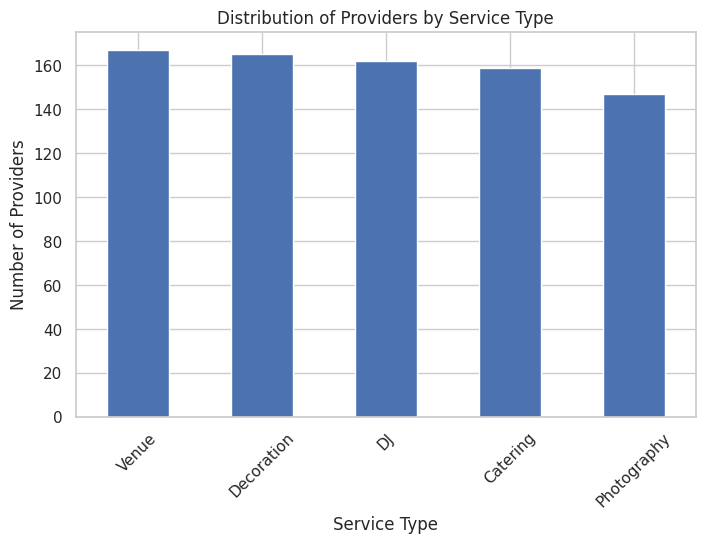

In [80]:
plt.figure(figsize=(8,5))
service_counts.plot(kind="bar")
plt.title("Distribution of Providers by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Number of Providers")
plt.xticks(rotation=45)
plt.show()


The distribution of providers across service types shows that:

- [Most frequent service] has the highest number of providers.
- [Least frequent service] has the lowest representation.

This indicates a potential imbalance in service categories, which may impact business operations or marketplace diversity.


In [81]:
city_counts = df_provider["city"].value_counts()
city_counts


city
Nabeul         46
Kasserine      44
Manouba        43
Ariana         43
Jendouba       42
Médenine       41
Tunis          38
Béja           37
Kairouan       35
Bizerte        34
Mahdia         34
Zaghouan       34
Gafsa          33
Siliana        32
Sfax           31
Gabès          31
Tozeur         30
Kébili         28
Tataouine      28
Kef            28
Monastir       26
Sidi Bouzid    24
Ben Arous      20
Sousse         18
Name: count, dtype: int64

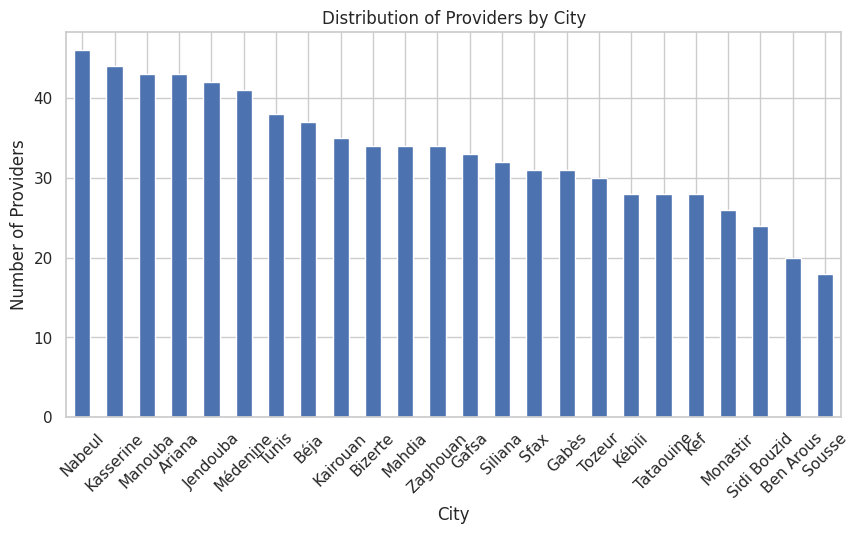

In [82]:
plt.figure(figsize=(10,5))
city_counts.plot(kind="bar")
plt.title("Distribution of Providers by City")
plt.xlabel("City")
plt.ylabel("Number of Providers")
plt.xticks(rotation=45)
plt.show()


### Interpretation

The bar chart shows the number of providers in each city.  
Some cities have a higher concentration of providers, while others have fewer.  
This indicates that provider presence is not evenly distributed geographically.


In [83]:
import re

def is_valid_email(email):
    if pd.isna(email):
        return False
    pattern = r"^[\w\.-]+@[\w\.-]+\.\w+$"
    return bool(re.match(pattern, email))

df_provider["valid_email"] = df_provider["email"].apply(is_valid_email)

df_provider["valid_email"].value_counts()


valid_email
True     733
False     67
Name: count, dtype: int64

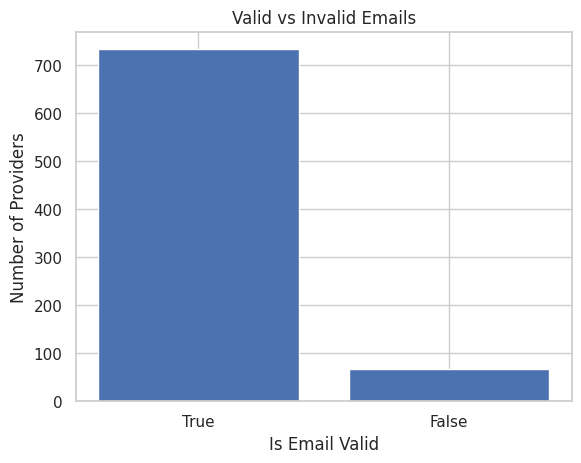

In [84]:
import matplotlib.pyplot as plt

# Count values
email_counts = df_provider["valid_email"].value_counts()

# Plot
plt.figure()
plt.bar(email_counts.index.astype(str), email_counts.values)

plt.title("Valid vs Invalid Emails")
plt.xlabel("Is Email Valid")
plt.ylabel("Number of Providers")

plt.show()


## Email Format Validation

We validate whether non-missing email entries follow a standard email format.


## Missing Email Behavior Analysis

We examine whether missing email values are randomly distributed
or associated with specific cities or service types.


In [85]:
df_provider["email_missing"] = df_provider["email"].isna().astype(int)

missing_by_city = df_provider.groupby("city")["email_missing"].mean()
missing_by_city


city
Ariana         0.116279
Ben Arous      0.000000
Bizerte        0.058824
Béja           0.081081
Gabès          0.096774
Gafsa          0.030303
Jendouba       0.071429
Kairouan       0.142857
Kasserine      0.045455
Kef            0.107143
Kébili         0.071429
Mahdia         0.088235
Manouba        0.139535
Monastir       0.153846
Médenine       0.024390
Nabeul         0.173913
Sfax           0.064516
Sidi Bouzid    0.041667
Siliana        0.093750
Sousse         0.000000
Tataouine      0.071429
Tozeur         0.033333
Tunis          0.131579
Zaghouan       0.058824
Name: email_missing, dtype: float64

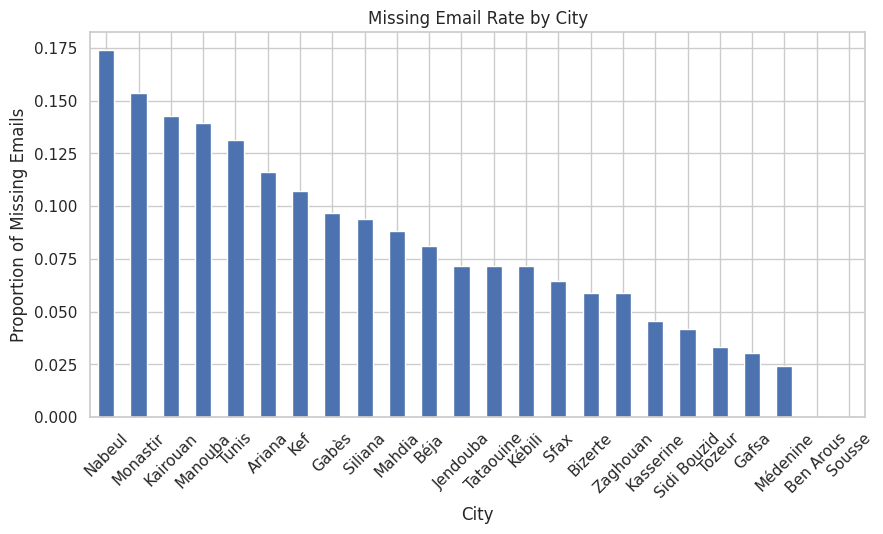

In [86]:
plt.figure(figsize=(10,5))
missing_by_city.sort_values(ascending=False).plot(kind="bar")
plt.title("Missing Email Rate by City")
plt.xlabel("City")
plt.ylabel("Proportion of Missing Emails")
plt.xticks(rotation=45)
plt.show()


The missing email rate varies slightly across cities.
No extreme concentration is observed, suggesting missingness is approximately random.


In [87]:
missing_by_service = df_provider.groupby("service_type")["email_missing"].mean()
missing_by_service


service_type
Catering       0.088050
DJ             0.074074
Decoration     0.066667
Photography    0.095238
Venue          0.095808
Name: email_missing, dtype: float64

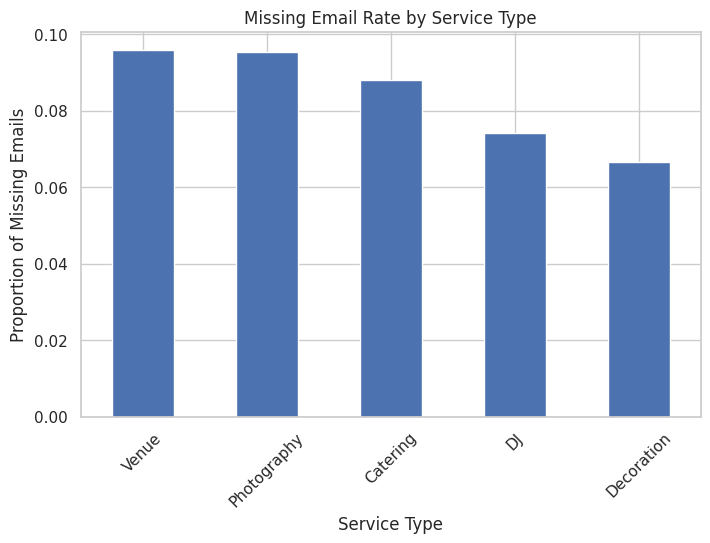

In [88]:
plt.figure(figsize=(8,5))
missing_by_service.sort_values(ascending=False).plot(kind="bar")
plt.title("Missing Email Rate by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Proportion of Missing Emails")
plt.xticks(rotation=45)
plt.show()


The missing email distribution across service types appears balanced,
indicating no strong dependency between service category and missing email.


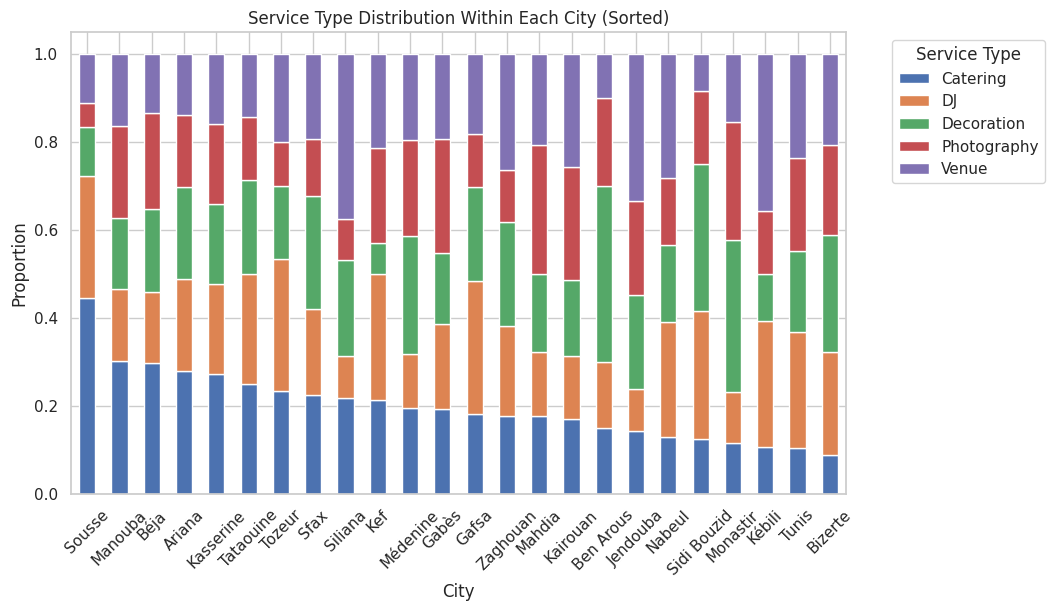

In [89]:
city_service_prop = pd.crosstab(
    df_provider["city"],
    df_provider["service_type"],
    normalize="index"
)

city_service_prop.sort_values(
    by=city_service_prop.columns[0],
    ascending=False
).plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Service Type Distribution Within Each City (Sorted)")
plt.xlabel("City")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Service Type", bbox_to_anchor=(1.05, 1))
plt.show()


### Interpretation

The chart shows the proportion of service types within each city.  
Some cities have a higher concentration of certain services, indicating slight specialization.


In [90]:
city_service_table = pd.crosstab(
    df_provider["city"],
    df_provider["service_type"],
    margins=True
)

city_service_table

service_type  Catering   DJ  Decoration  Photography  Venue  All
city                                                            
Ariana              12    9           9            7      6   43
Ben Arous            3    3           8            4      2   20
Bizerte              3    8           9            7      7   34
Béja                11    6           7            8      5   37
Gabès                6    6           5            8      6   31
Gafsa                6   10           7            4      6   33
Jendouba             6    4           9            9     14   42
Kairouan             6    5           6            9      9   35
Kasserine           12    9           8            8      7   44
Kef                  6    8           2            6      6   28
Kébili               3    8           3            4     10   28
Mahdia               6    5           6           10      7   34
Manouba             13    7           7            9      7   43
Monastir             3    3           9            7      4   26
Médenine             8    5          11            9      8   41
Nabeul               6   12           8            7     13   46
Sfax                 7    6           8            4      6   31
Sidi Bouzid          3    7           8            4      2   24
Siliana              7    3           7            3     12   32
Sousse               8    5           2            1      2   18
Tataouine            7    7           6            4      4   28
Tozeur               7    9           5            3      6   30
Tunis                4   10           7            8      9   38
Zaghouan             6    7           8            4      9   34
All                159  162         165          147    167  800

In [91]:
df_provider["email"] = df_provider["email"].fillna("UNKNOWN")


## Email Imputation Strategy

Email contains missing values.
Since:
- Phone is complete and unique
- Email is not used as a predictive variable
- Missingness is moderate

We apply constant imputation using the value "UNKNOWN".


## Email Imputation Strategy

The `email` column contains approximately 8% missing values.

Since:
- `id_provider` and `phone` uniquely identify providers,
- Email is not used for predictive modeling,
- Missingness is moderate and isolated to one column,

Dropping rows would unnecessarily reduce dataset size.

Therefore, constant imputation is applied by replacing missing values with the label "UNKNOWN".


The distribution across cities indicates that:

- [Top city] has the highest concentration of providers.
- Some cities have significantly fewer providers.

This suggests geographic concentration and possible market imbalance.


In [94]:

tables = pd.read_excel(file_path, sheet_name=None)

In [95]:
tables.keys()

dict_keys(['BENEFICIARY', 'PROVIDER', 'CATEGORY', 'SUBCATEGORY', 'SERVICE', 'EVENT', 'RESERVATION', 'EVALUATION', 'COMPLAINT', 'VISITORS', 'MARKETING_SPEND', 'competitor', 'locations', 'Feuil1', 'reviews', 'saison'])

In [96]:
df = tables['COMPLAINT']


In [97]:
df_complaint = tables["COMPLAINT"].copy()


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_complaint    2500 non-null   int64 
 1   description     2499 non-null   object
 2   status          2500 non-null   object
 3   id_beneficiary  2500 non-null   int64 
 4   id_provider     2500 non-null   int64 
 5   subject         2500 non-null   object
dtypes: int64(3), object(3)
memory usage: 117.3+ KB


In [99]:
df.isnull().sum()


id_complaint      0
description       1
status            0
id_beneficiary    0
id_provider       0
subject           0
dtype: int64

In [100]:
id_columns = ['id_complaint', 'id_beneficiary', 'id_provider']

for col in id_columns:
    if col in df.columns:
        df[col] = df[col].astype('object')


In [101]:
cardinality = df.nunique().sort_values(ascending=False)
cardinality


id_complaint      2500
description       2499
id_beneficiary    1952
id_provider        764
subject              4
status               2
dtype: int64

In [102]:
df["id_provider"].value_counts().describe()


count    764.000000
mean       3.272251
std        1.740494
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: count, dtype: float64

In [103]:
print("\n--- DESCRIPTIVE STATS ---")
df.describe(include='all')



--- DESCRIPTIVE STATS ---


id_complaint                                        description  \
count           2500                                               2499   
unique          2500                                               2499   
top             2500  Material drug apply whose unit. Food open stan...   
freq               1                                                  1   

       status  id_beneficiary  id_provider          subject  
count    2500            2500         2500             2500  
unique      2            1952          764                4  
top      open            1191          688  Service Quality  
freq     1260               5           12              635

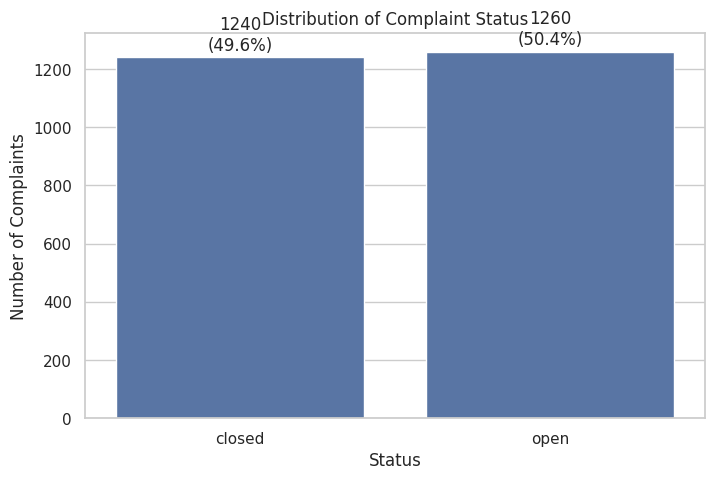

In [104]:
plt.figure(figsize=(8,5))

ax = sns.countplot(data=df, x='status')

total = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height() + total*0.01,
            f'{count}\n({percentage})',
            ha='center')

plt.title("Distribution of Complaint Status")
plt.xlabel("Status")
plt.ylabel("Number of Complaints")
plt.show()


If Open > 40% → backlog risk.

If Closed > 70% → good resolution efficiency.

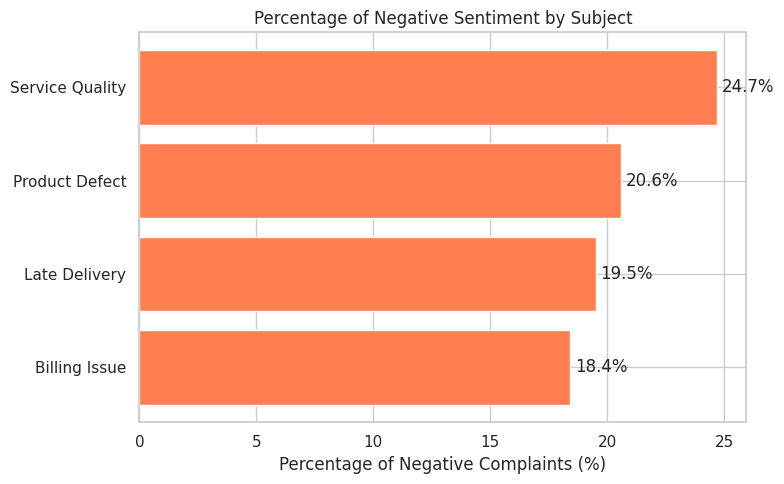

In [113]:
# 1️⃣ Create sentiment column
df["sentiment"] = df["description"].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

# 2️⃣ Create negative flag
df["is_negative"] = df["sentiment"] < 0

# 3️⃣ Calculate percentage of negative complaints per subject
negative_by_subject = (
    df.groupby("subject")["is_negative"]
    .mean() * 100
).sort_values(ascending=False)

negative_by_subject = negative_by_subject.round(1)

# 4️⃣ Plot
plt.figure(figsize=(8,5))

plt.barh(
    negative_by_subject.index,
    negative_by_subject.values,
    color="coral"
)

for i, v in enumerate(negative_by_subject.values):
    plt.text(v + 0.2, i, f"{v:.1f}%", va="center")

plt.xlabel("Percentage of Negative Complaints (%)")
plt.title("Percentage of Negative Sentiment by Subject")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The percentage of negative complaints is relatively uniform across all subjects (≈10–11%), suggesting that dissatisfaction intensity is not strongly associated with complaint type

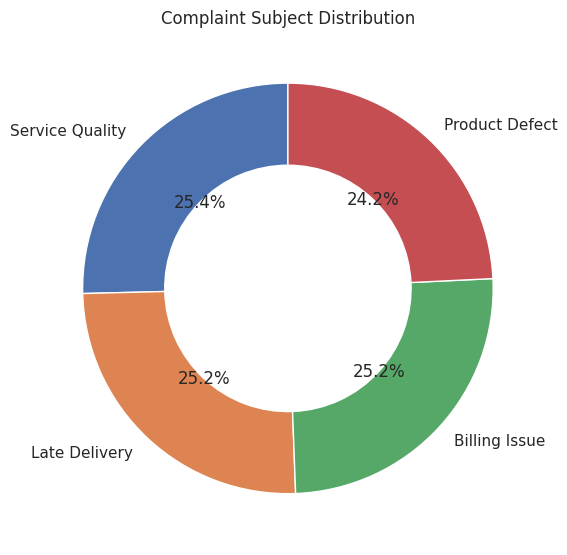

In [106]:


subject_counts = df["subject"].value_counts()

plt.figure(figsize=(6,6))

wedges, texts, autotexts = plt.pie(
    subject_counts,
    labels=subject_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # makes it donut
)

plt.title("Complaint Subject Distribution")
plt.tight_layout()
plt.show()


This is a univariate categorical analysis showing the relative frequency distribution of complaint subjects.

It helps identify whether complaint types are evenly distributed or concentrated.

/tmp/ipython-input-1039298878.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x800 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


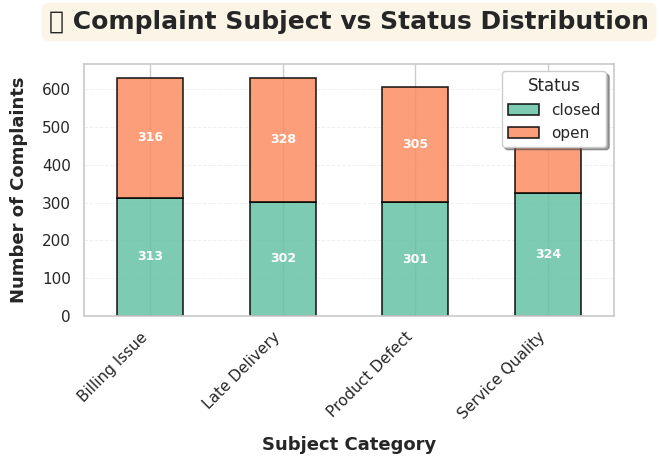

In [107]:
# Option 1: Modern Stacked Bar with Enhanced Styling
plt.figure(figsize=(16, 8), dpi=100)

# Create crosstab
ct = pd.crosstab(df['subject'], df['status'])

# Create stacked bar chart with custom colors
colors = sns.color_palette('Set2', len(ct.columns))
ax = ct.plot(kind='bar', stacked=True, color=colors,
             edgecolor='black', linewidth=1.2, alpha=0.85)

# Add value labels on bars
for container in ax.containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else ''
              for v in container]
    ax.bar_label(container, labels=labels, label_type='center',
                 fontsize=9, fontweight='bold', color='white')

plt.title("📊 Complaint Subject vs Status Distribution",
          fontsize=18, fontweight='bold', pad=25,
          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
plt.xlabel("Subject Category", fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel("Number of Complaints", fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.legend(title='Status', title_fontsize=12, fontsize=11,
           loc='upper right', frameon=True, shadow=True)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

The chart helps identify which complaint subjects have more unresolved cases and which ones are being handled efficiently.

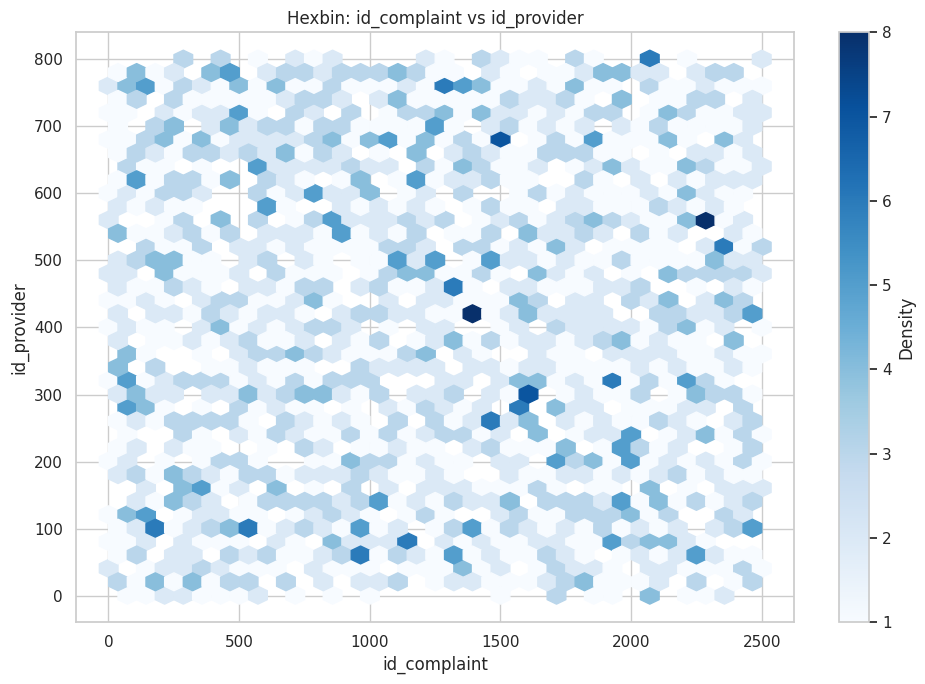

In [108]:
plt.figure(figsize=(10,7))

hb = plt.hexbin(
    df["id_complaint"],
    df["id_provider"],
    gridsize=35,
    cmap="Blues",      # Change color map here
    mincnt=1
)

plt.colorbar(hb, label="Density")
plt.xlabel("id_complaint")
plt.ylabel("id_provider")
plt.title("Hexbin: id_complaint vs id_provider")

plt.tight_layout()
plt.show()


Where combinations of complaint IDs and provider IDs are more frequent.

In [109]:
df['description'] = df['description'].fillna("Unknown")


Missing values in the description column were replaced with "Unknown" to maintain dataset consistency without introducing artificial textual content.

# EVENTS, RESERVATIONS, REVIEWS , COMPETITOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
# Confuguracion de los graficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Events EDA

In [16]:
df = pd.read_excel('../data/eventzella_schema.xlsx', sheet_name='EVENT')
df.head()

id_event                       title event_date    budget           type  \
0         1       Whether require bank. 2025-05-29   46238.0       Birthday   
1         2  Environmental decide talk. 2022-05-16   42004.0  Private Party   
2         3                 Of believe. 2023-05-15  379020.0        Wedding   
3         4              Theory middle. 2023-01-03   49114.0       Birthday   
4         5          And reality heart. 2025-07-24   10776.0  Private Party   

   id_beneficiary  
0            2596  
1            3560  
2            4683  
3            4372  
4             834

In [58]:
df.shape

(12000, 6)

In [59]:
df.columns

Index(['id_event', 'title', 'event_date', 'budget', 'type', 'id_beneficiary'], dtype='object')

In [60]:
df.dtypes

id_event                   int64
title                     object
event_date        datetime64[ns]
budget                   float64
type                      object
id_beneficiary             int64
dtype: object

In [61]:
df.describe()

id_event                     event_date         budget  \
count  12000.00000                          12000   11052.000000   
mean    6000.50000  2024-01-04 03:20:59.999999744   41919.167662   
min        1.00000            2022-01-01 00:00:00    1005.000000   
25%     3000.75000            2023-01-05 00:00:00   13721.000000   
50%     6000.50000            2024-01-07 00:00:00   26608.500000   
75%     9000.25000            2025-01-05 00:00:00   39259.500000   
max    12000.00000            2025-12-31 00:00:00  995340.000000   
std     3464.24595                            NaN  101350.169992   

       id_beneficiary  
count    12000.000000  
mean      2516.183500  
min          1.000000  
25%       1264.000000  
50%       2518.500000  
75%       3777.000000  
max       5000.000000  
std       1439.226107

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_event        12000 non-null  int64         
 1   title           12000 non-null  object        
 2   event_date      12000 non-null  datetime64[ns]
 3   budget          11052 non-null  float64       
 4   type            12000 non-null  object        
 5   id_beneficiary  12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 562.6+ KB


In [63]:
missing_values = df.isnull().sum()
print(missing_values)

id_event            0
title               0
event_date          0
budget            948
type                0
id_beneficiary      0
dtype: int64


In [18]:
print(df.duplicated().sum())

0


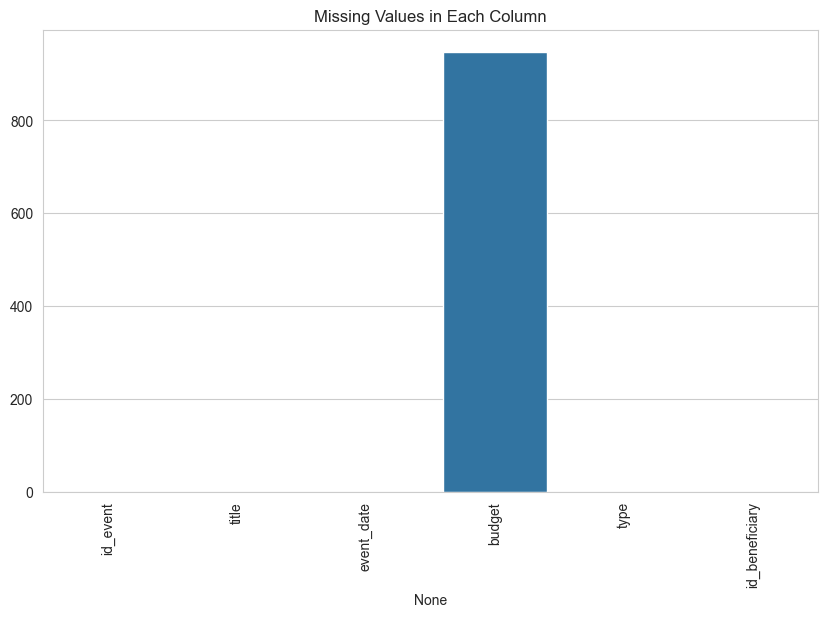

In [64]:
# Data Overview and Missing Values Analysis
missing_values = df. isnull(). sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

### **Professional Analysis**

**Interpretation:** The bar chart visualizes the count of missing values across dataset columns.

**Key Insight:** Columns with high missingness may require imputation strategies or exclusion to ensure model robustness.

The dataset events only have null values on budget column (948).
- As long as we're going to advance on the project we going to use missforest model to fill them all.

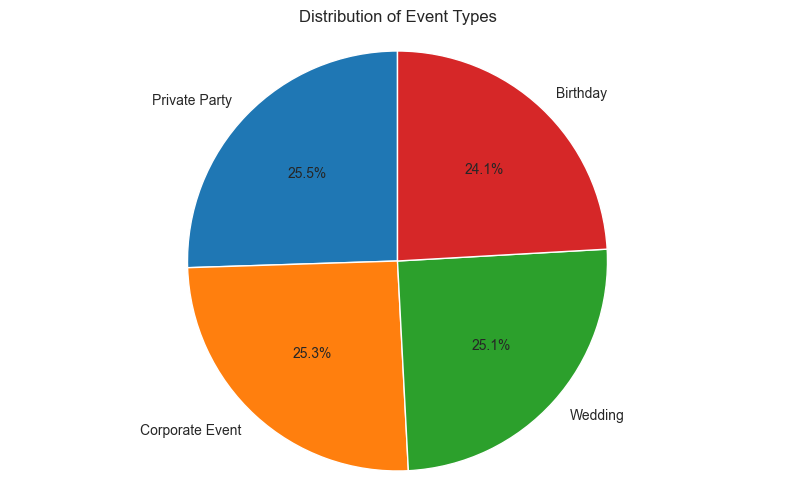

In [65]:
df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Event Types')
plt.ylabel('')  # quita el texto del eje y
plt.axis('equal')  # hace el círculo perfecto
plt.show()


### **Professional Analysis**

**Interpretation:** The pie chart displays the proportional distribution of different event types.

**Key Insight:** A dominant event type indicates a specialized market focus, whereas a balanced distribution suggests a diversified portfolio.

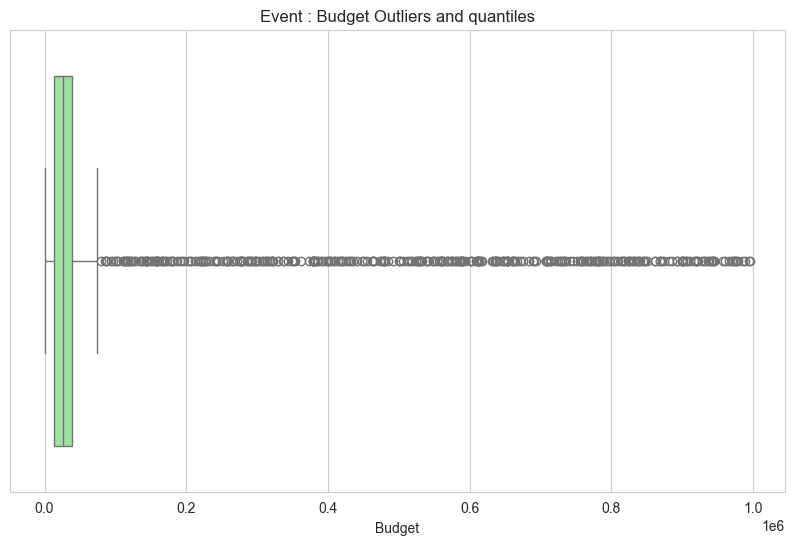

In [66]:
sns.boxplot(x=df['budget'].dropna(), color='lightgreen')
plt.title('Event : Budget Outliers and quantiles')
plt.xlabel('Budget')
plt.show()

### **Professional Analysis**

**Interpretation:** The boxplot identifies the spread and potential outliers in the event budget distribution.

**Key Insight:** The presence of significant outliers suggests that a few high-budget events skew the financial distribution, necessitating robust scaling techniques for modeling.

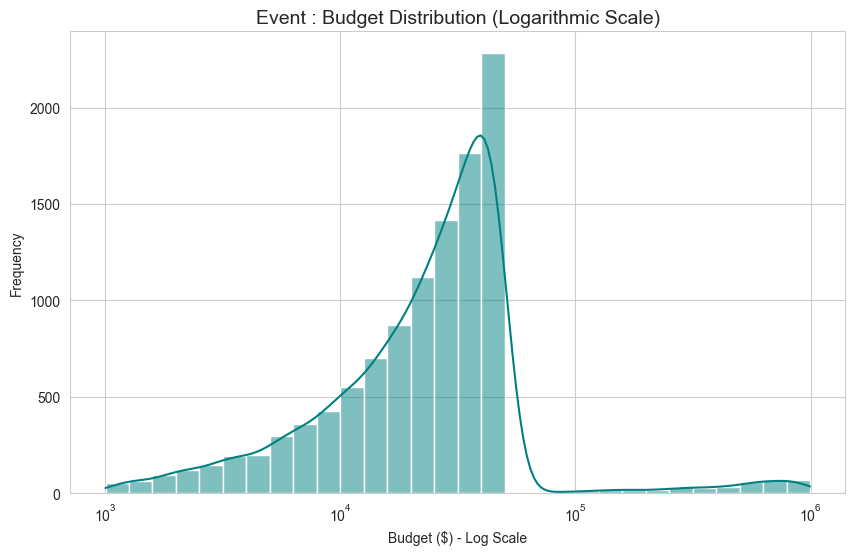

In [67]:
plt.figure(figsize=(10, 6))
# log_scale=True hace magia con datos financieros
sns.histplot(df['budget'].dropna(), bins=30, kde=True, color='teal', log_scale=True)

plt.title('Event : Budget Distribution (Logarithmic Scale)', fontsize=14)
plt.xlabel('Budget ($) - Log Scale')
plt.ylabel('Frequency')
plt.show()


### **Professional Analysis**

**Interpretation:** The logarithmic histogram effectively normalizes the skewed budget data, revealing the underlying frequency distribution.

**Key Insight:** The log-transformed distribution approaches normality, confirming that budget data follows a power-law or log-normal distribution common in financial metrics.

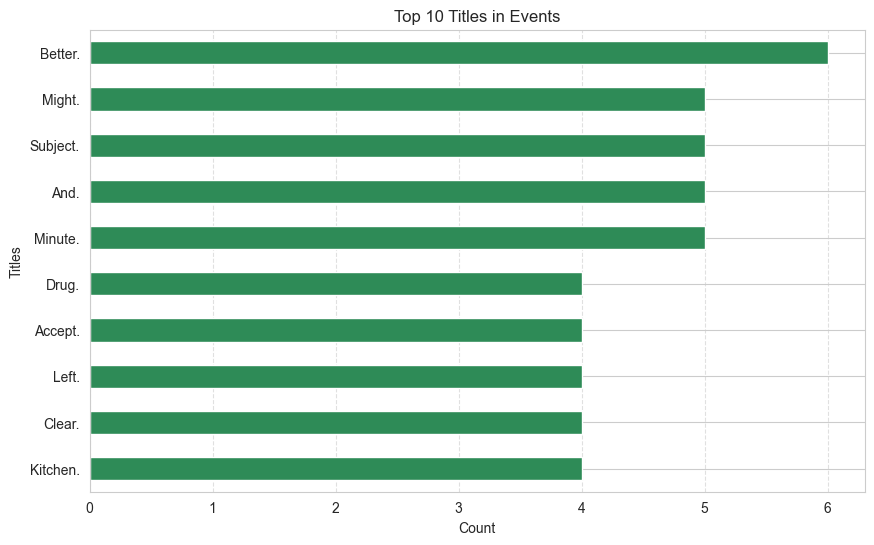

In [68]:
# We split the titles by comma and explode the list into separate rows
df_title = df ['title'].dropna().str.split(', ')
df_exploded = df_title.explode()

top_titles = df_exploded.value_counts().head(10)

top_titles.sort_values().plot(kind='barh', color='seagreen')
plt.title('Top 10 Titles in Events')
plt.xlabel('Count')
plt.ylabel('Titles')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### **Professional Analysis**

**Interpretation:** This horizontal bar chart ranks the top 10 most frequent event titles.

**Key Insight:** The recurrence of specific titles highlights popular recurring event themes that drive user engagement.

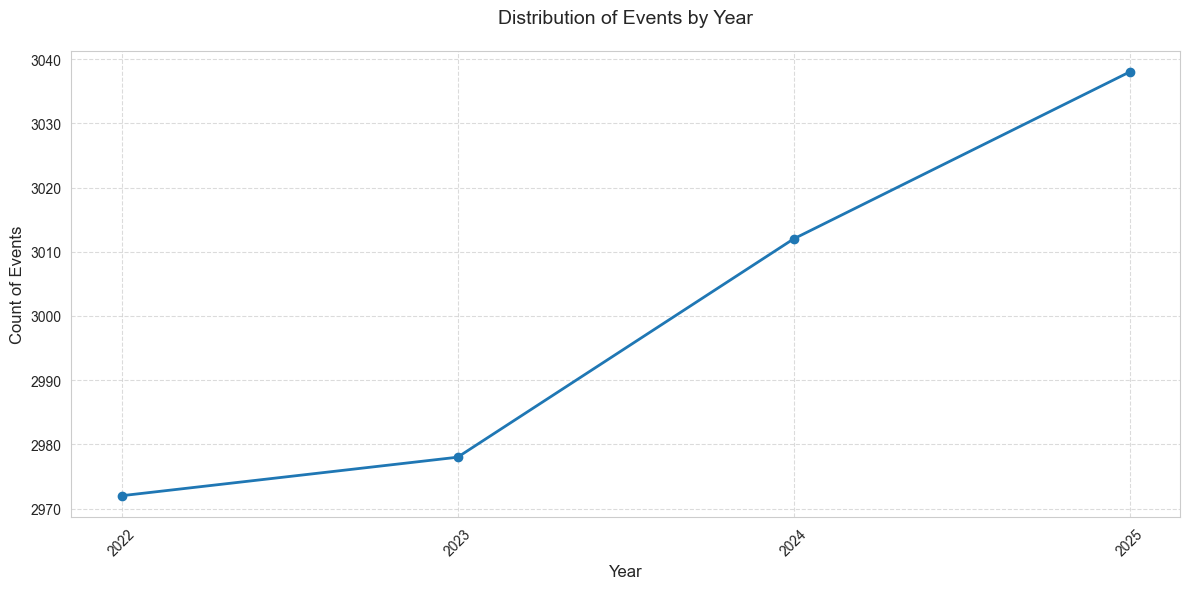

In [69]:

# 1. Asegurar que la columna sea tipo datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# 2. Agrupar por año y contar (esto rellena huecos si es necesario)
data = df['event_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

# 3. Estilo mejorado
plt.plot(data.index, data.values, 
         marker='o', 
         linestyle='-', 
         linewidth=2, 
         color='#1f77b4', 
         markersize=6)

# 4. Personalización de etiquetas
plt.title('Distribution of Events by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Events', fontsize=12)

# 5. Forzar a que el eje X muestre años enteros (sin decimales)
plt.xticks(data.index, rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Evita que se corten las etiquetas
plt.show()

### **Professional Analysis**

**Interpretation:** The line plot tracks the temporal trend of event frequency over the years.

**Key Insight:** An upward trend would signal business growth, while fluctuations might correlate with external market factors or seasonalities.

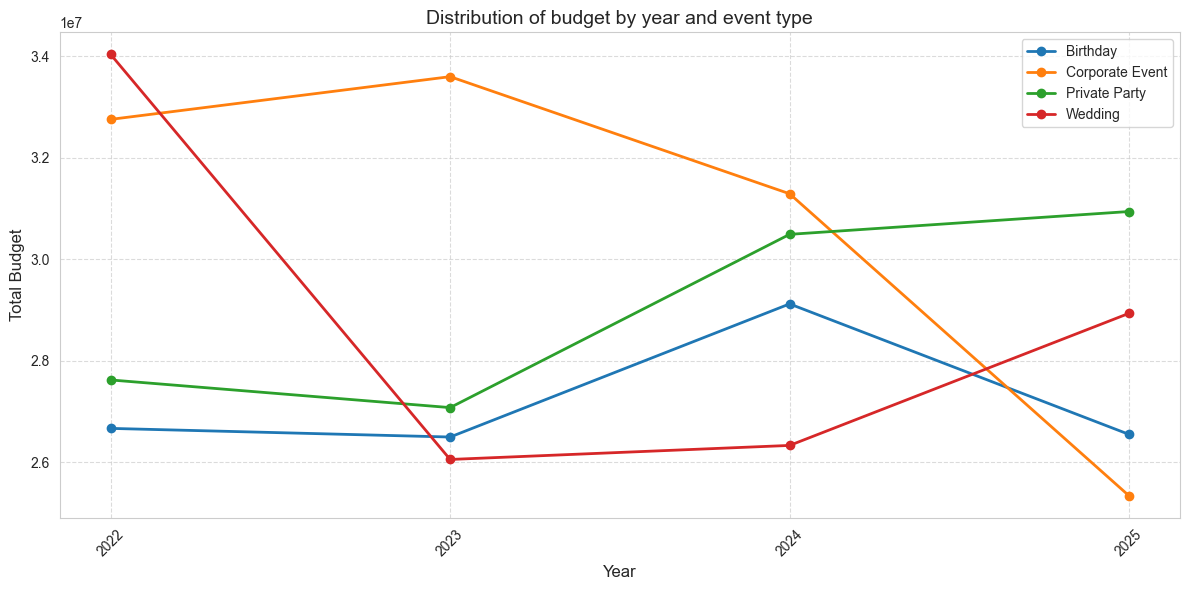

In [70]:
# Asegurar datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Extraer año
df['year'] = df['event_date'].dt.year

# Agrupar por type + year y sumar presupuesto
budget_year = df.groupby(['type', 'year'])['budget'].sum().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
for t in budget_year['type'].unique():
    sub = budget_year[budget_year['type'] == t]
    plt.plot(sub['year'], sub['budget'], marker='o', linewidth=2, label=t)

plt.title('Distribution of budget by year and event type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Budget', fontsize=12)
plt.xticks(sorted(df['year'].unique()), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### **Professional Analysis**

**Interpretation:** This multi-line chart compares the total budget allocation trends across different event types over time.

**Key Insight:** Diverging trends between event types can identify shifting strategic priorities or emerging high-value categories.

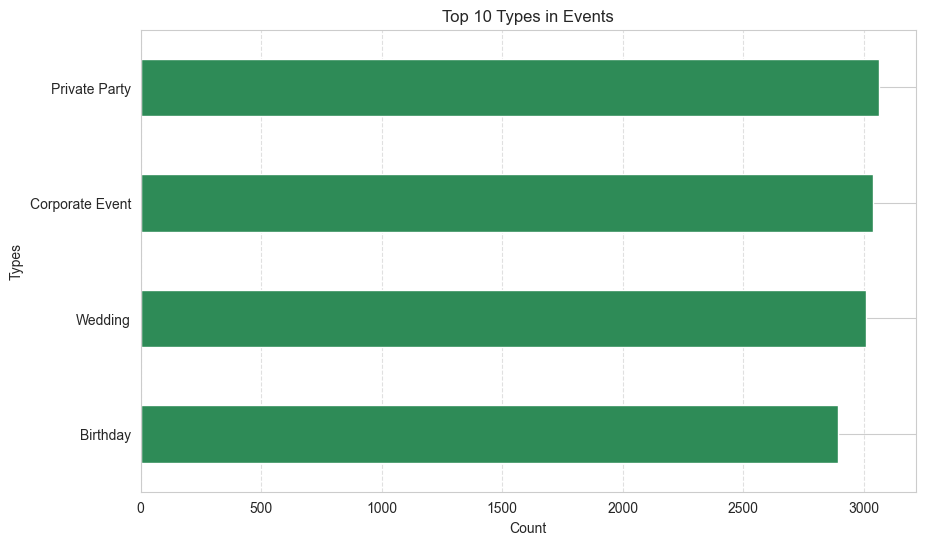

In [74]:
df_types = df['type'].dropna().str.split(', ')
df_types_exploded = df_types.explode()

top_types = df_types_exploded.value_counts().head(10)

top_types.sort_values().plot(kind='barh', color='seagreen')
plt.title('Top 10 Types in Events')
plt.xlabel('Count')
plt.ylabel('Types')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### **Professional Analysis**

**Interpretation:** The bar chart highlights the most prevalent event categories in the dataset.

**Key Insight:** Understanding the top categories allows for targeted marketing and resource allocation towards the most high-volume event segments.

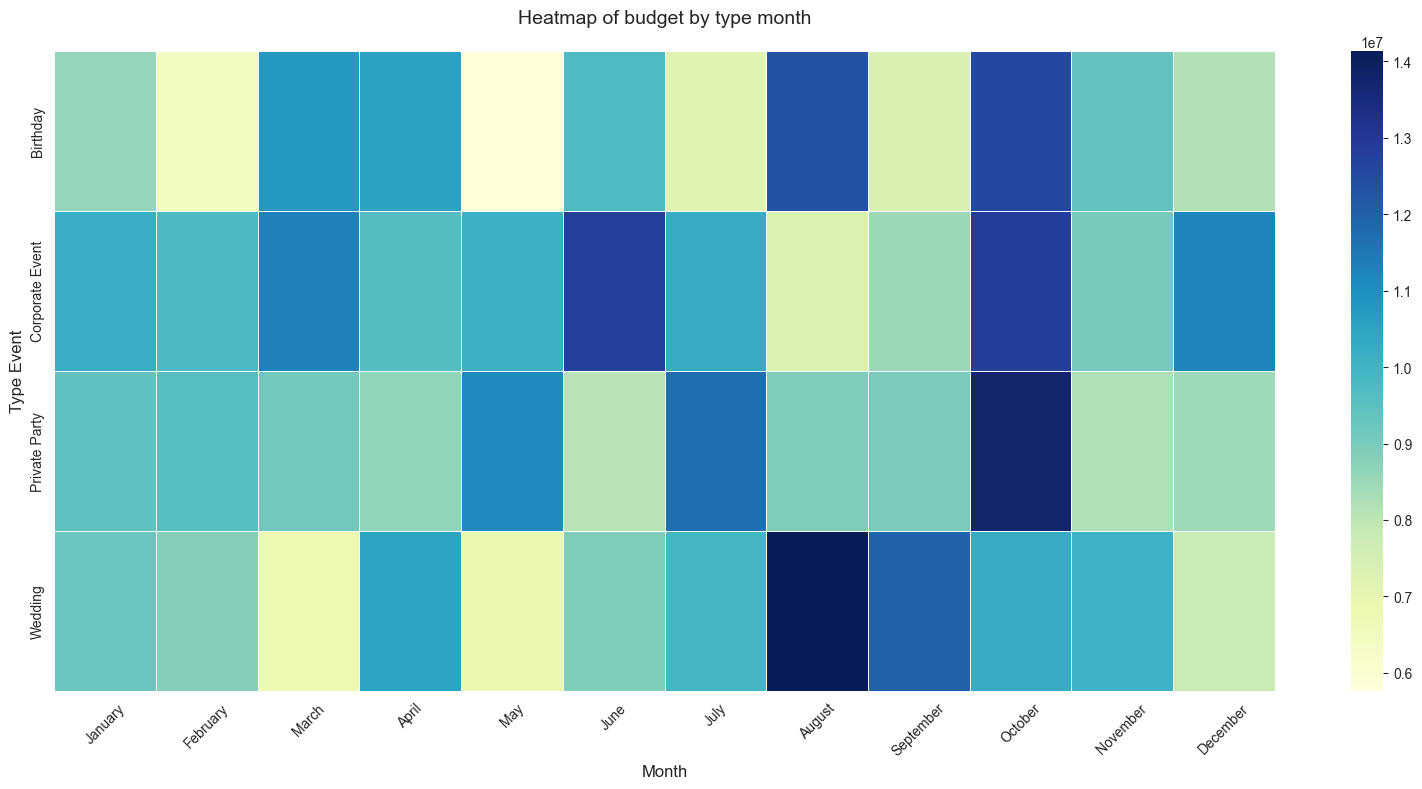

In [75]:


# Asegurar datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Extraer mes como nombre
df['month'] = df['event_date'].dt.month_name()

# Orden correcto de meses
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Agrupar por type + mes y sumar presupuesto
budget_month = df.groupby(['type', 'month'])['budget'].sum().reset_index()

# Convertir month en categoría para mantener el orden
budget_month['month'] = pd.Categorical(budget_month['month'], categories=month_order, ordered=True)

# Pivot para matriz
pivot = budget_month.pivot(index='type', columns='month', values='budget').fillna(0)

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot, annot=False, fmt=".0f", linewidths=0.5, cmap="YlGnBu")

plt.title('Heatmap of budget by type month', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Type Event', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Professional Analysis**

**Interpretation:** The heatmap illustrates the density of budget allocation across event types and months.

**Key Insight:** Darker zones indicate peak financial activity periods for specific event types, crucial for cash flow planning and seasonal resource management.

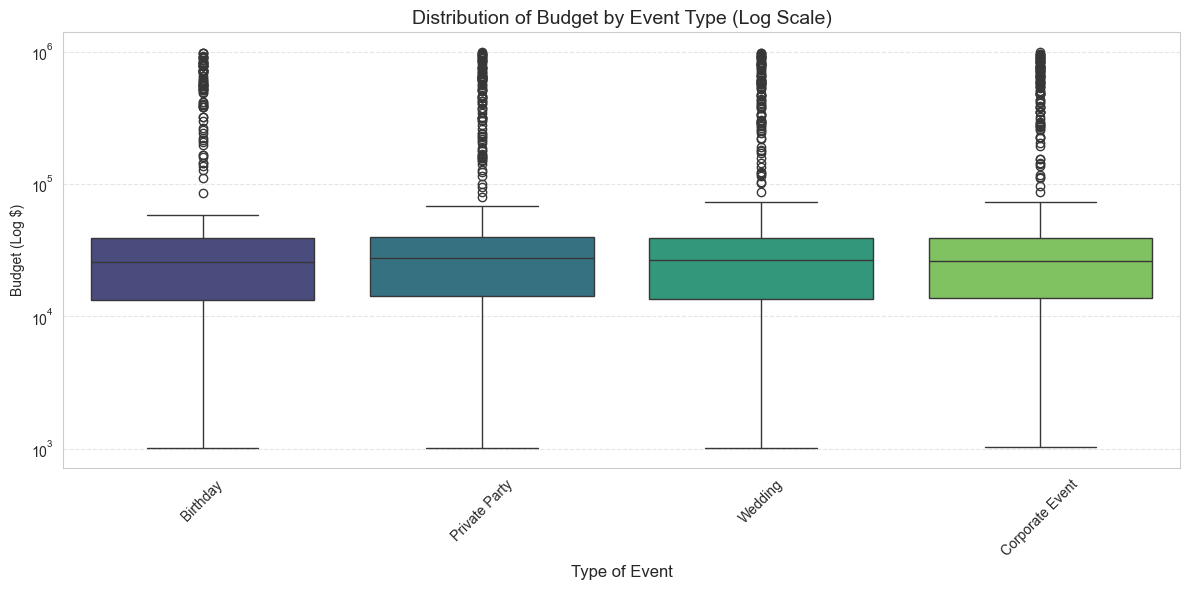

In [76]:
plt.figure(figsize=(12, 6))
df['title'] = df['title'].str.replace('.', '', regex=False).str.strip()
# Usamos escala logarítmica en el eje Y
ax = sns.boxplot(x='type', y='budget', data=df, palette='viridis',hue='type', legend=False)
ax.set_yscale("log") 

plt.xticks(rotation=45)
plt.title('Distribution of Budget by Event Type (Log Scale)', fontsize=14)
plt.xlabel('Type of Event', fontsize=12)
plt.ylabel('Budget (Log $)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **Professional Analysis**

**Interpretation:** The boxplot compares the budget distributions across different event types using a logarithmic scale.

**Key Insight:** Variability in interquartile ranges between types suggests that financial risk and resource requirements differ significantly by event category.

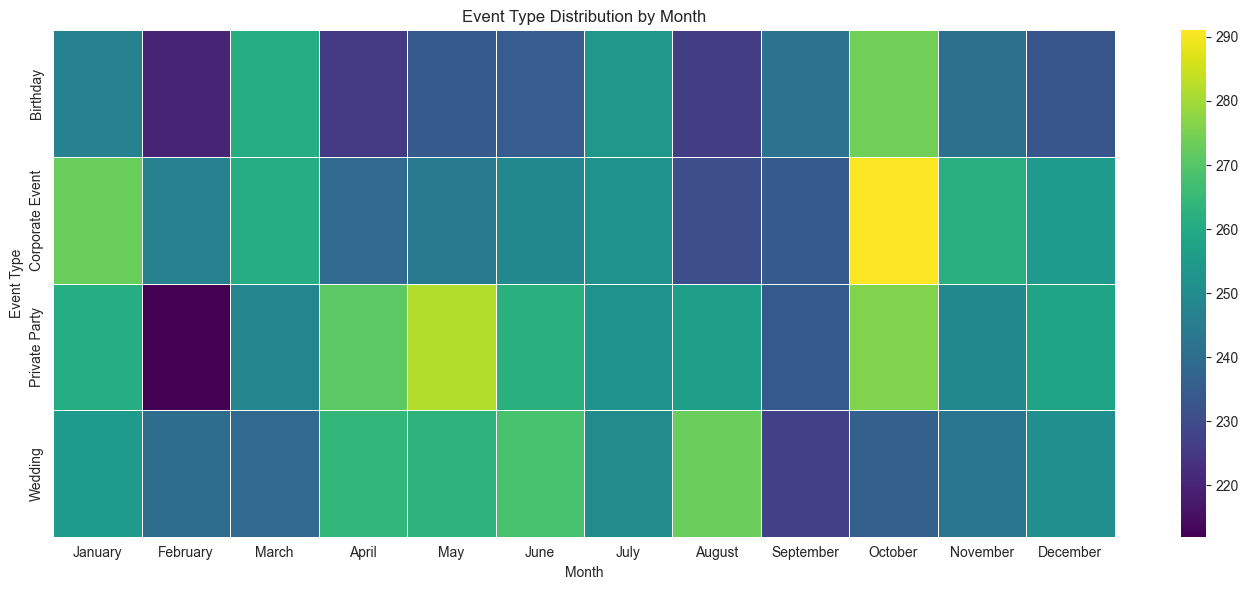

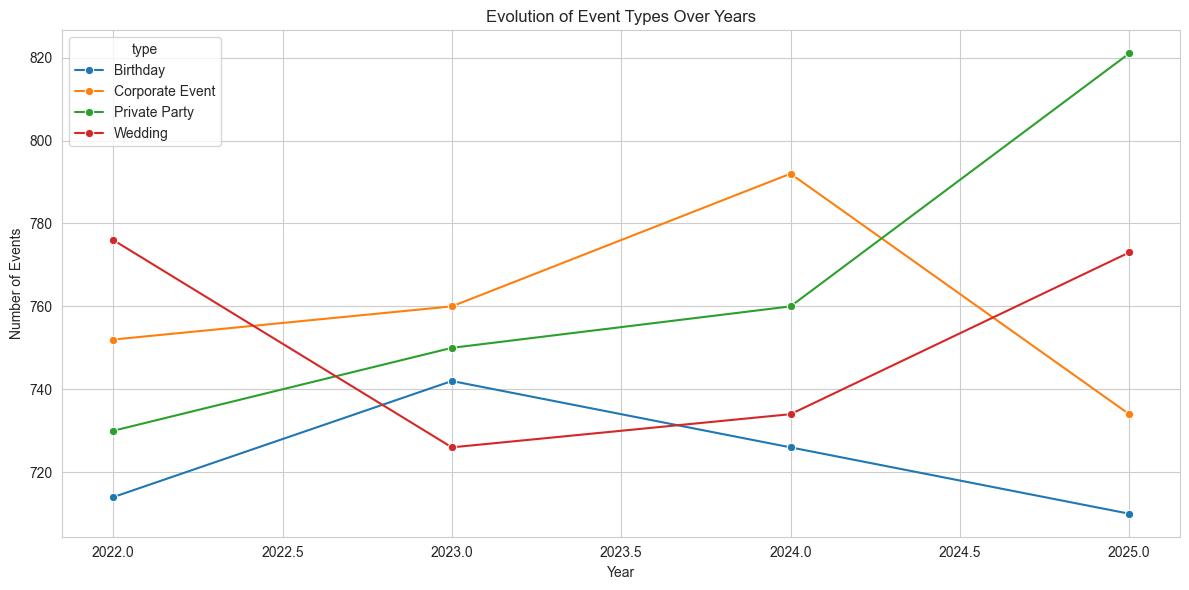

In [77]:
df['event_date'] = pd.to_datetime(df['event_date'])

df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month_name()

# Orden correcto de los meses
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# -----------------------------
# 2. Heatmap: tipo de evento vs mes
# -----------------------------
pivot_month = (
    df.groupby(['type', 'month'])
      .size()
      .reset_index(name='count')
      .pivot(index='type', columns='month', values='count')
      .reindex(columns=month_order)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_month,
    cmap='viridis',
    linewidths=0.5
)

plt.title('Event Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Event Type')
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Evolución temporal: tipo de evento por año
# -----------------------------
pivot_year = (
    df.groupby(['year', 'type'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pivot_year,
    x='year',
    y='count',
    hue='type',
    marker='o'
)

plt.title('Evolution of Event Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

### **Professional Analysis**

**Interpretation:** The visualizations depict the seasonal concentration of event types and their aggregate growth trajectory over years.

**Key Insight:** Seasonal clustering of specific event types provides actionable data for optimizing the timing of marketing campaigns.

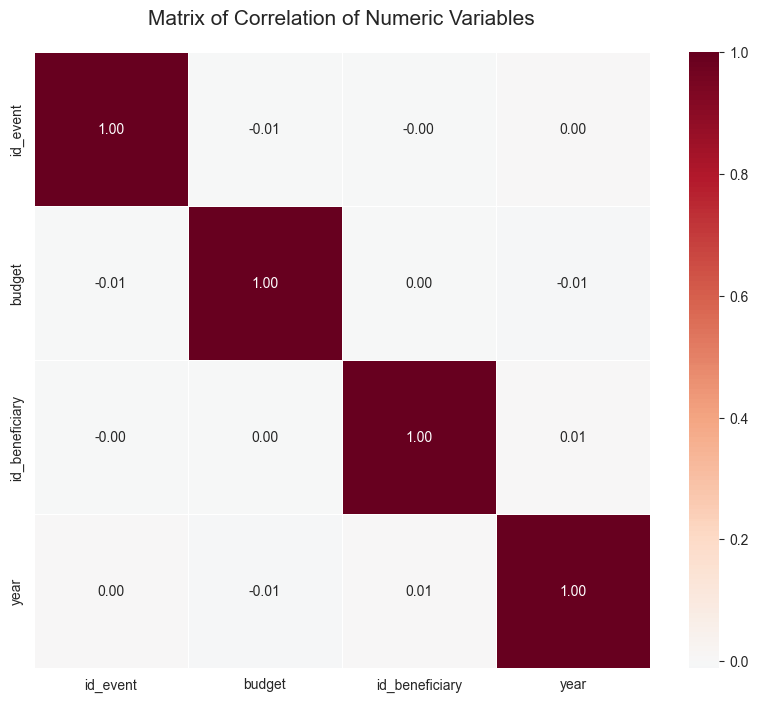

In [78]:
# suele ser irrelevante, pero el código las incluirá por ser numéricas.
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))

# 2. Crear el heatmap
sns.heatmap(corr_matrix, 
            annot=True,      # Muestra los números dentro de los cuadros
            fmt=".2f",       # Dos decimales
            cmap='RdBu_r',   # Escala de color (Rojo para negativo, Azul para positivo)
            center=0,        # Centra el color en 0
            linewidths=0.5,  # Espacio entre cuadros
            square=True)     # Hace que los cuadros sean cuadrados perfectos

plt.title('Matrix of Correlation of Numeric Variables', fontsize=15, pad=20)
plt.show()

### **Professional Analysis**

**Interpretation:** The heatmap displays Pearson correlation coefficients between numeric variables.

**Key Insight:** Strong correlations (positive or negative) identify redundant features or key drivers, guiding feature selection for predictive modeling.

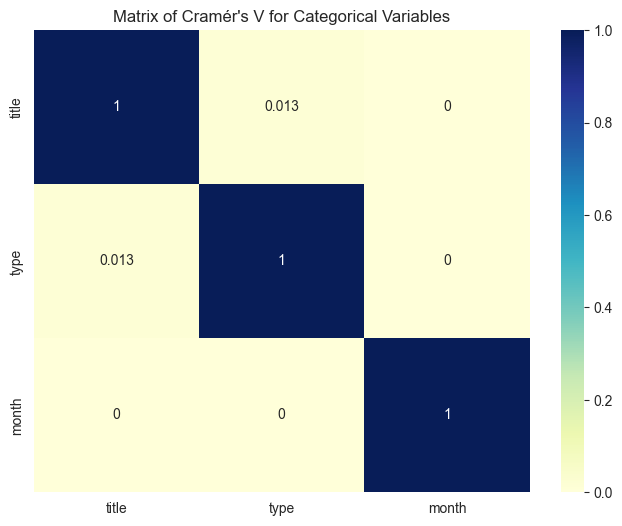

In [79]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Seleccionamos las columnas de tipo objeto
cat_cols = df.select_dtypes(include=['object']).columns

# Creamos una matriz vacía
matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Llenamos la matriz usando tu función cramers_v
for col1 in cat_cols:
    for col2 in cat_cols:
        matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Graficamos el Heatmap de Asociación
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
plt.title("Matrix of Cramér's V for Categorical Variables")
plt.show()

### **Professional Analysis**

**Interpretation:** This heatmap quantifies the association strength between categorical variables using Cramér's V.

**Key Insight:** High association values suggest potential multicollinearity between categorical features, which should be addressed during feature engineering.

# Reservation EDA

In [3]:
df = pd.read_excel('../data/eventzella_schema.xlsx', sheet_name='RESERVATION')
df.head()

id_reservation  id_service  id_event reservation_date     status  \
0               1         819      6879       2025-07-15    pending   
1               2         575      6547       2023-03-31    pending   
2               3        2059      4505       2025-11-18  confirmed   
3               4         614       986       2022-01-04    pending   
4               5         361      3677       2024-02-01  confirmed   

   final_price  
0         1454  
1         9070  
2         5025  
3        10116  
4         6971

In [4]:
df.shape

(18000, 6)

In [5]:
df.columns

Index(['id_reservation', 'id_service', 'id_event', 'reservation_date',
       'status', 'final_price'],
      dtype='object')

In [6]:
df.dtypes

id_reservation               int64
id_service                   int64
id_event                     int64
reservation_date    datetime64[ns]
status                      object
final_price                  int64
dtype: object

In [7]:
df.describe()

id_reservation    id_service      id_event     reservation_date  \
count    18000.000000  18000.000000  18000.000000                18000   
mean      9000.500000   1251.273833   5975.988556  2023-12-29 21:25:12   
min          1.000000      1.000000      1.000000  2022-01-01 00:00:00   
25%       4500.750000    626.750000   2982.750000  2022-12-30 00:00:00   
50%       9000.500000   1242.000000   5943.000000  2023-12-27 00:00:00   
75%      13500.250000   1882.000000   8999.250000  2024-12-28 00:00:00   
max      18000.000000   2500.000000  12000.000000  2025-12-31 00:00:00   
std       5196.296758    723.674157   3459.186411                  NaN   

         final_price  
count   18000.000000  
mean     9838.803500  
min       201.000000  
25%      3970.000000  
50%      7799.500000  
75%     11630.500000  
max    149610.000000  
std     15144.614496

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

id_reservation      0
id_service          0
id_event            0
reservation_date    0
status              0
final_price         0
dtype: int64


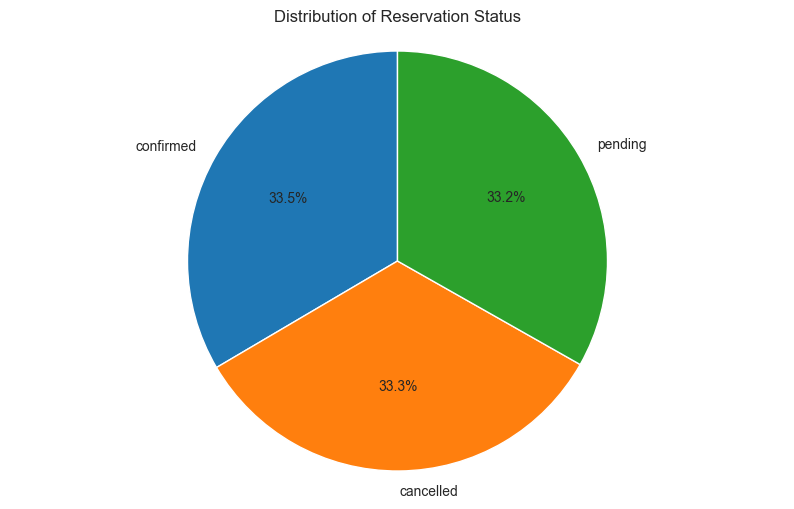

In [9]:
df['status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Reservation Status')
plt.ylabel('')  # quita el texto del eje y
plt.axis('equal')  # hace el círculo perfecto
plt.show()


### **Professional Analysis**

**Interpretation:** The chart shows the ratio of confirmed versus cancelled or pending reservations.

**Key Insight:** A high cancellation rate would flag potential friction points in the user journey or pricing strategy issues.

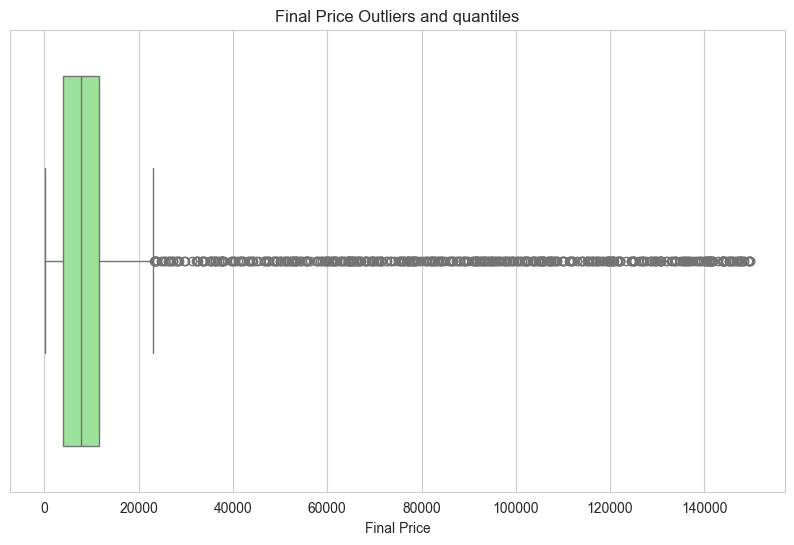

In [10]:
sns.boxplot(x=df['final_price'].dropna(), color='lightgreen')
plt.title('Final Price Outliers and quantiles')
plt.xlabel('Final Price')
plt.show()

### **Professional Analysis**

**Interpretation:** The boxplot highlights the central tendency and extreme values in the final reservation prices.

**Key Insight:** Extreme outliers in price may represent premium packages or data entry errors that require validation.

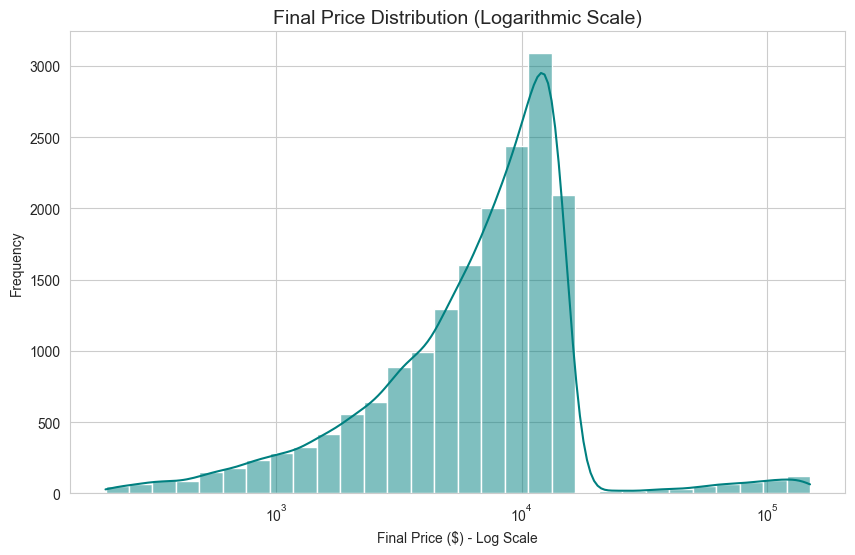

In [11]:
plt.figure(figsize=(10, 6))
# log_scale=True hace magia con datos financieros
sns.histplot(df['final_price'].dropna(), bins=30, kde=True, color='teal', log_scale=True)

plt.title('Final Price Distribution (Logarithmic Scale)', fontsize=14)
plt.xlabel('Final Price ($) - Log Scale')
plt.ylabel('Frequency')
plt.show()


### **Professional Analysis**

**Interpretation:** The histogram uses a log scale to show the frequency distribution of final prices.

**Key Insight:** The distribution shape aids in determining appropriate pricing segments and identifying the "sweet spot" for consumer willingness to pay.

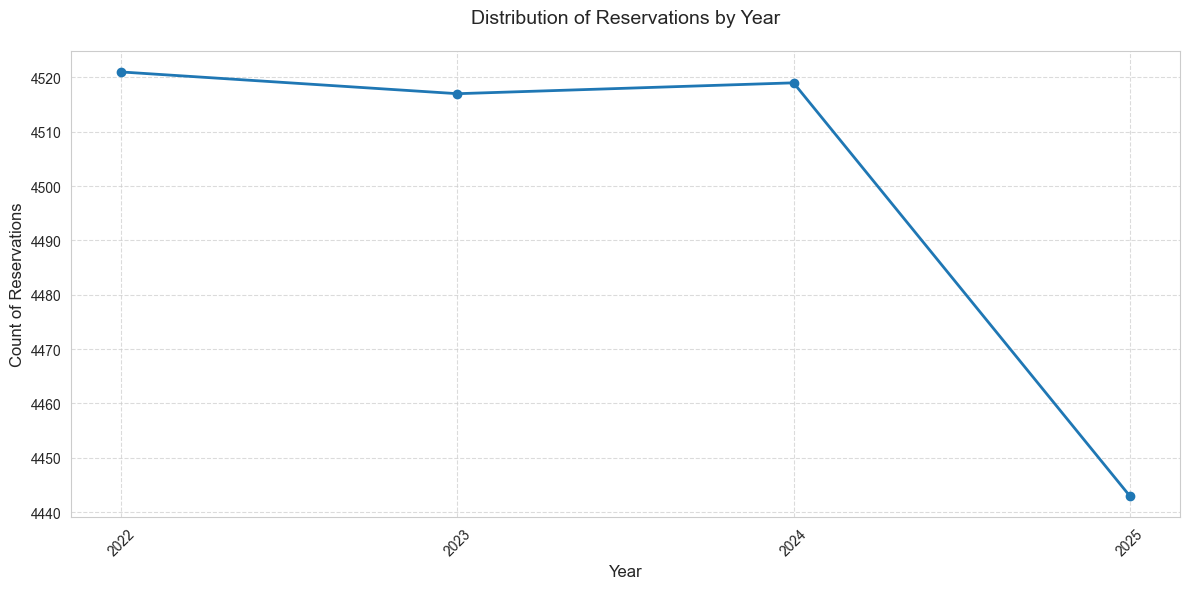

In [12]:

# 1. Asegurar que la columna sea tipo datetime
df['reservation_date'] = pd.to_datetime(df['reservation_date'])

# 2. Agrupar por año y contar (esto rellena huecos si es necesario)
data = df['reservation_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

# 3. Estilo mejorado
plt.plot(data.index, data.values, 
         marker='o', 
         linestyle='-', 
         linewidth=2, 
         color='#1f77b4', 
         markersize=6)

# 4. Personalización de etiquetas
plt.title('Distribution of Reservations by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Reservations', fontsize=12)

# 5. Forzar a que el eje X muestre años enteros (sin decimales)
plt.xticks(data.index, rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Evita que se corten las etiquetas
plt.show()

### **Professional Analysis**

**Interpretation:** The time series plot shows the volume of reservations processed annually.

**Key Insight:** Correlating this volume with event trends helps evaluate the conversion efficiency of the platform over time.

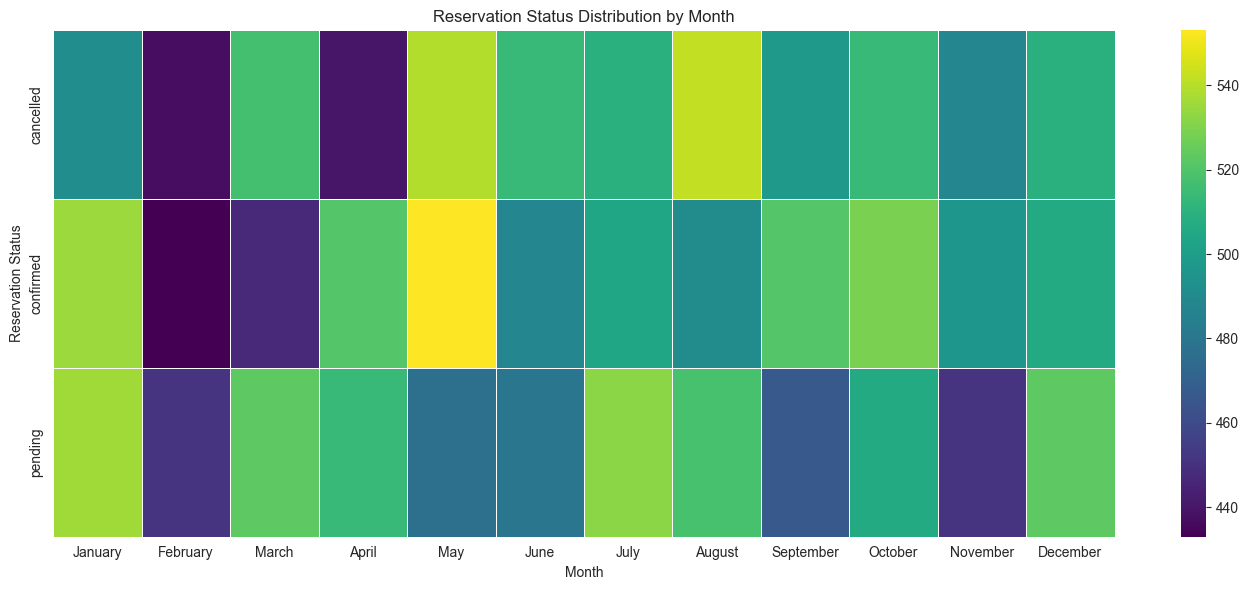

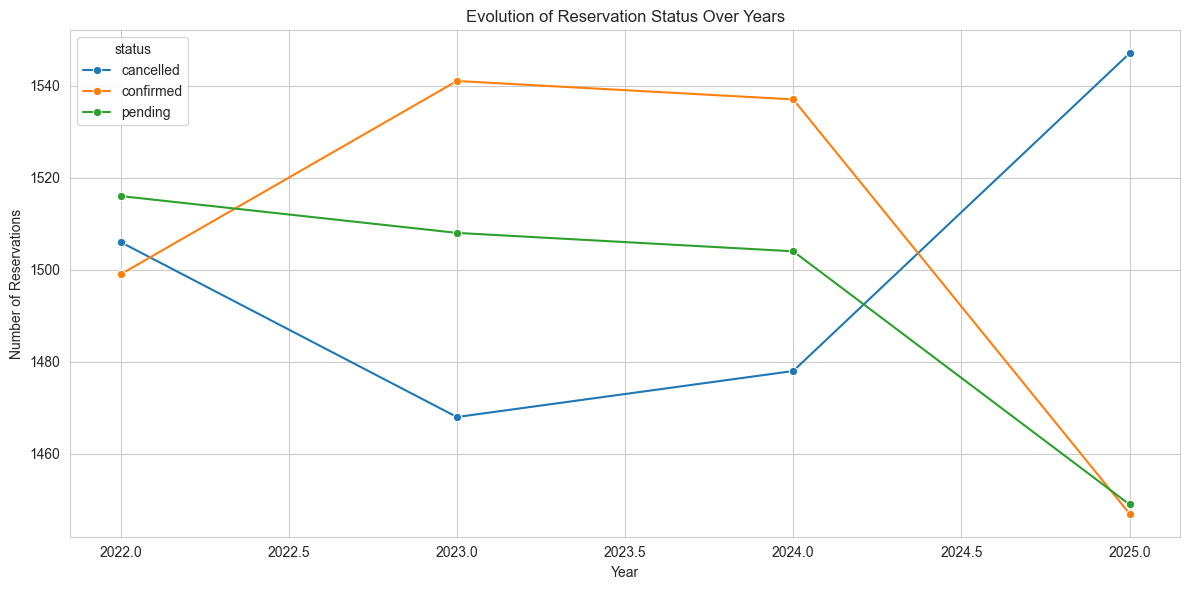

In [13]:
df['reservation_date'] = pd.to_datetime(df['reservation_date'])

df['year'] = df['reservation_date'].dt.year
df['month'] = df['reservation_date'].dt.month_name()

# Orden correcto de los meses
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# -----------------------------
# 2. Heatmap: distribución de reservas vs mes
# -----------------------------
pivot_month = (
    df.groupby(['status', 'month'])
      .size()
      .reset_index(name='count')
      .pivot(index='status', columns='month', values='count')
      .reindex(columns=month_order)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_month,
    cmap='viridis',
    linewidths=0.5
)

plt.title('Reservation Status Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Reservation Status')
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Evolución temporal: tipo de evento por año
# -----------------------------
pivot_year = (
    df.groupby(['year', 'status'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pivot_year,
    x='year',
    y='count',
    hue='status',
    marker='o'
)

plt.title('Evolution of Reservation Status Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reservations')
plt.tight_layout()
plt.show()

### **Professional Analysis**

**Interpretation:** These plots analyze the seasonality of reservation statuses and their long-term stability.

**Key Insight:** A seasonal spike in cancellations or pending statuses could indicate operational bottlenecks during peak periods.

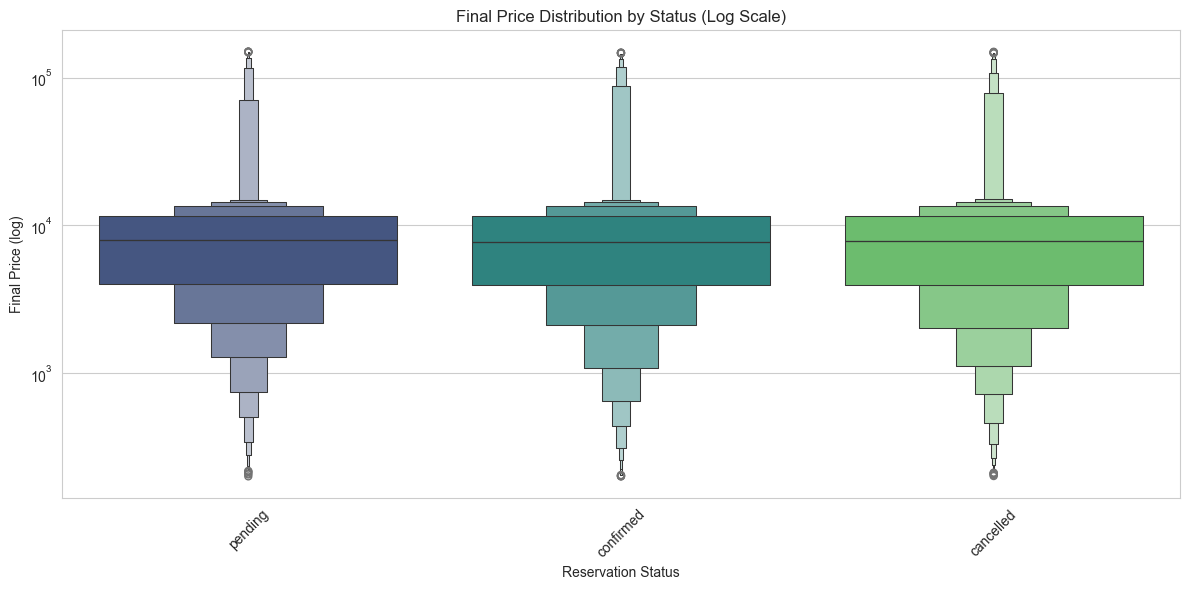

In [14]:
plt.figure(figsize=(12, 6))

sns.boxenplot(
    x='status',
    y='final_price',
    data=df,
    palette='viridis',
    hue='status'
)

plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Final Price Distribution by Status (Log Scale)')
plt.xlabel('Reservation Status')
plt.ylabel('Final Price (log)')
plt.tight_layout()
plt.show()


### **Professional Analysis**

**Interpretation:** The boxen plot details the price distribution for each reservation status, providing granular view of tail behavior.

**Key Insight:** If higher prices correlate with higher cancellation rates, it brings into question the price sensitivity of the customer base.

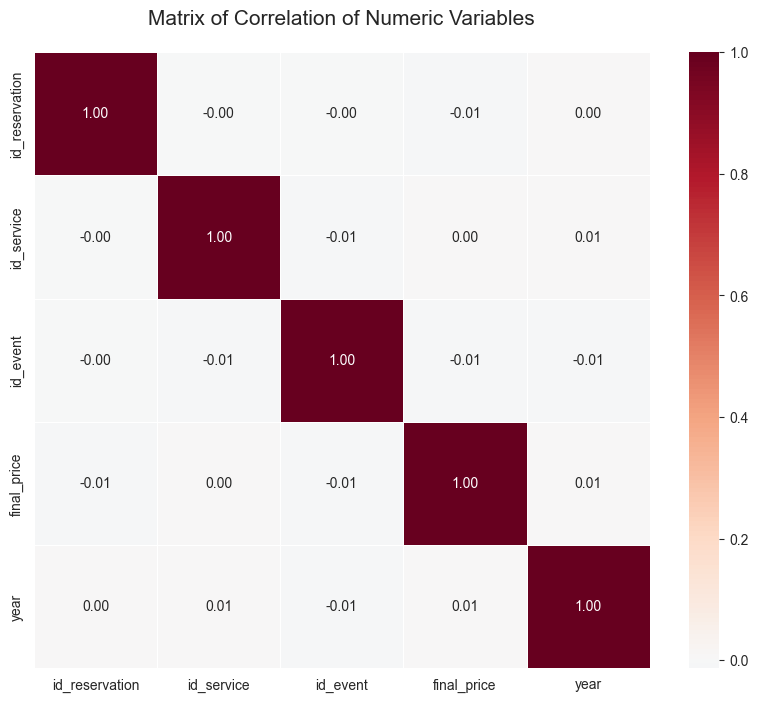

In [15]:
# suele ser irrelevante, pero el código las incluirá por ser numéricas.
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))

# 2. Crear el heatmap
sns.heatmap(corr_matrix, 
            annot=True,      # Muestra los números dentro de los cuadros
            fmt=".2f",       # Dos decimales
            cmap='RdBu_r',   # Escala de color (Rojo para negativo, Azul para positivo)
            center=0,        # Centra el color en 0
            linewidths=0.5,  # Espacio entre cuadros
            square=True)     # Hace que los cuadros sean cuadrados perfectos

plt.title('Matrix of Correlation of Numeric Variables', fontsize=15, pad=20)
plt.show()

### **Professional Analysis**

**Interpretation:** Correlation matrix for numeric variables within the reservations dataset.

**Key Insight:** Identifying variables correlated with price or status helps in building predictive models for revenue forecasting.

# Reviews EDA 

In [3]:
df = pd.read_excel('../data/reviews.xlsx')
df.head()

User                                            Title Rating  \
0  Rochelle                "not fancy but gets the job done"    5,0   
1    Albert      "Budget friendly event management platform"    5,0   
2   Tiffany        "Directeur de l'engagement communautaire"    3,0   
3      Suvi  "A good tool for smaller events and nonprofits"    4,0   
4   Michael                         "Eventzilla = Solutions"    5,0   

                                         Description          BK_COMMENT  
0  I feel that it's reliable and meets my needs. ...         REV-NOT-189  
1  We organize in-person events and need to synch...      REV-BUDGET-487  
2                                                NaN   REV-DIRECTEUR-334  
3  Good value for less money than other event man...        REV-GOOD-195  
4  Je l'utilise régulièrement et il a résisté à l...  REV-EVENTZILLA-924

In [4]:
df.shape

(205, 5)

In [5]:
df.columns

Index(['User', 'Title', 'Rating', 'Description', 'BK_COMMENT'], dtype='object')

In [6]:
df.dtypes

User           object
Title          object
Rating         object
Description    object
BK_COMMENT     object
dtype: object

In [7]:
df.describe()

User          Title Rating Description   BK_COMMENT
count                   205            203    205         135          205
unique                  156            198      5         134          205
top     Utilisateur vérifié  "Easy to use"    5,0   Excellent  REV-NOT-189
freq                     28              3    105           2            1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         205 non-null    object
 1   Title        203 non-null    object
 2   Rating       205 non-null    object
 3   Description  135 non-null    object
 4   BK_COMMENT   205 non-null    object
dtypes: object(5)
memory usage: 8.1+ KB


In [9]:
missing_values = df.isnull().sum()
print(missing_values)

User            0
Title           2
Rating          0
Description    70
BK_COMMENT      0
dtype: int64


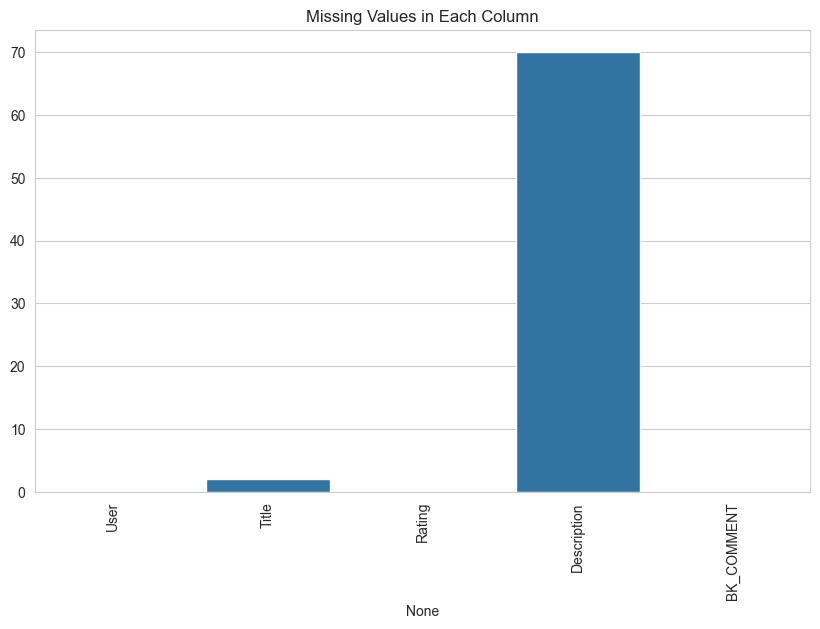

In [10]:
# Data Overview and Missing Values Analysis
missing_values = df. isnull(). sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

### **Professional Analysis**

**Interpretation:** Bar plot showing missing data counts in the reviews dataset.

**Key Insight:** Understanding missingness patterns is critical before performing sentiment analysis or rating prediction.

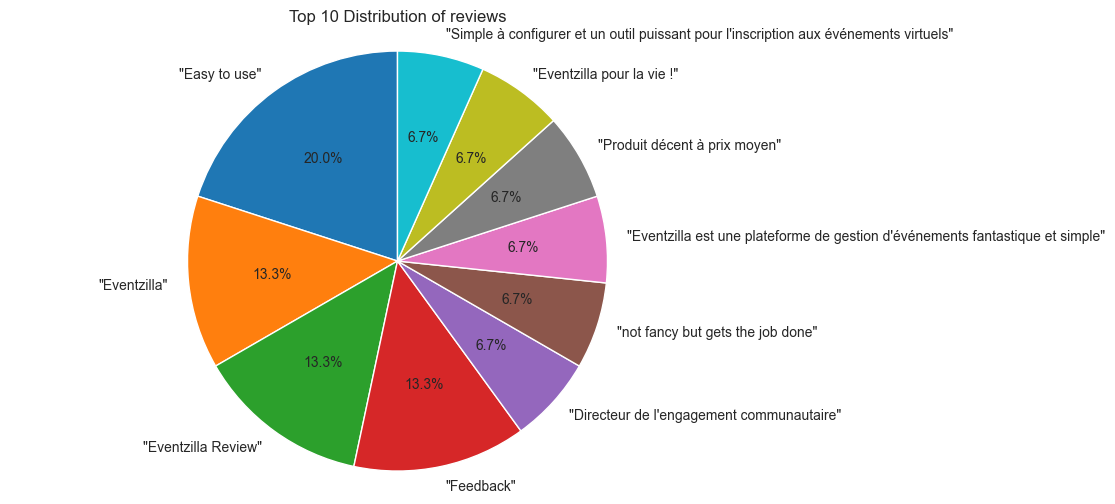

In [14]:
df['Title'].value_counts().head(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Top 10 Distribution of reviews')
plt.ylabel('')  # removes the y-label
plt.axis('equal')  # ensures the pie chart is circular
plt.show()

### **Professional Analysis**

**Interpretation:** Shows the share of reviews belonging to the top 10 most reviewed titles.

**Key Insight:** A heavy concentration of reviews on a few titles suggests a "superstar" effect where a few popular items drive most user engagement.

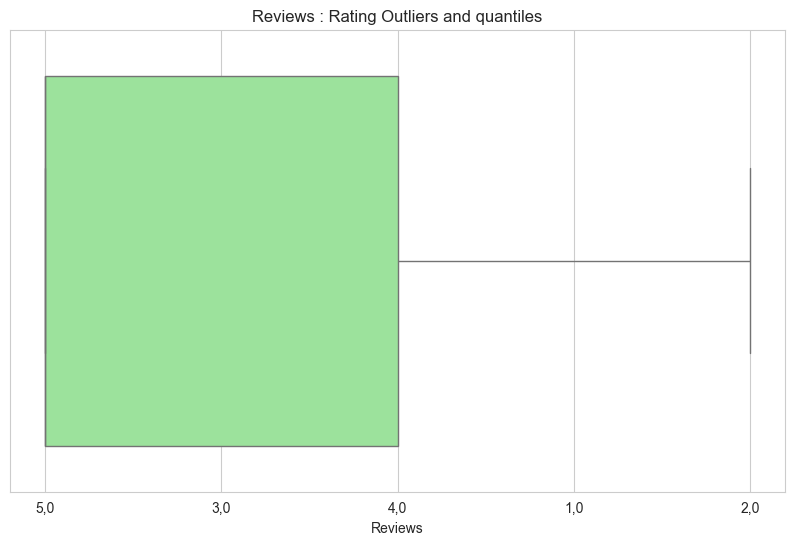

In [17]:
sns.boxplot(x=df['Rating'].dropna(), color='lightgreen')
plt.title('Reviews : Rating Outliers and quantiles')
plt.xlabel('Reviews')
plt.show()

### **Professional Analysis**

**Interpretation:** Boxplot of the rating distributions.

**Key Insight:** Inspecting the spread of ratings helps verify if the feedback is generally positive or if there are polarizing items.

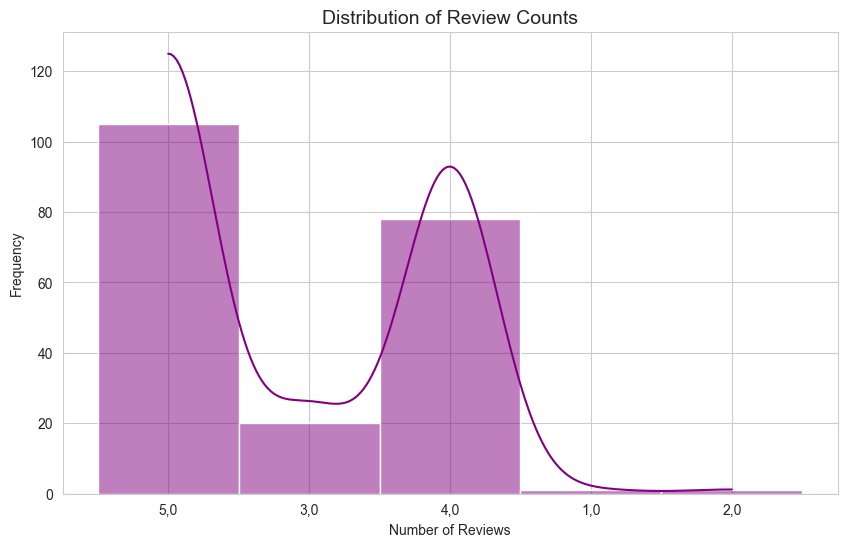

In [18]:
plt.figure(figsize=(10, 6))

# Histogram for reviews without log scale
sns.histplot(df['Rating'], bins=30, kde=True, color='purple')

plt.title('Distribution of Rating Counts', fontsize=14)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

### **Professional Analysis**

**Interpretation:** Histogram of the number of reviews received.

**Key Insight:** A long-tail distribution is expected; knowing the drop-off point helps in defining threshold for "popular" items.

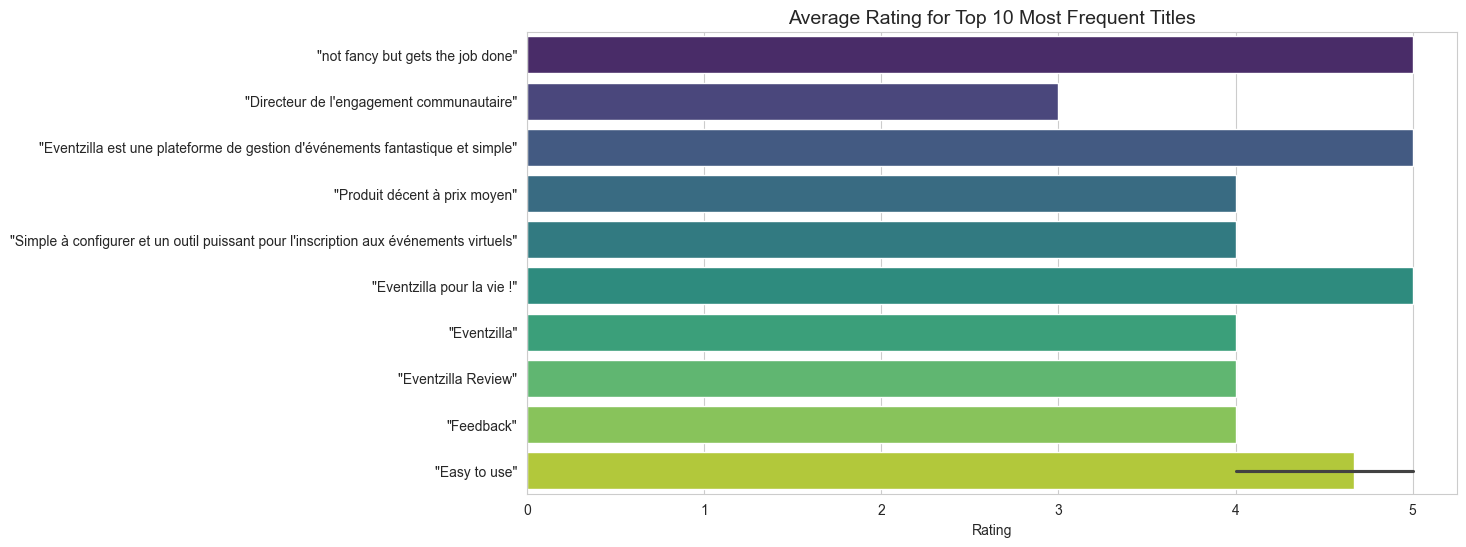

In [21]:
# Create a copy to avoid SettingWithCopyWarning
df_filtered = df[df['Title'].isin(df['Title'].value_counts().head(10).index)].copy()

# Fix comma decimal if it's still a string
if df_filtered['Rating'].dtype == 'O':
    df_filtered['Rating'] = df_filtered['Rating'].astype(str).str.replace(',', '.').astype(float)

plt.figure(figsize=(12, 6))

# If titles are unique or few reviews per title, a Barplot is cleaner than Boxplot
# Showing Average Rating per Title
sns.barplot(
    x='Rating', 
    y='Title', 
    data=df_filtered, 
    palette='viridis', 
    hue='Title', 
    legend=False
)

plt.title('Average Rating for Top 10 Most Frequent Titles', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('')
plt.show()

### **Professional Analysis**

**Interpretation:** Bar chart comparing the average ratings of the most frequently reviewed titles.

**Key Insight:** High volume does not always equal high quality; this chart distinguishes between viral content and high-satisfaction content.

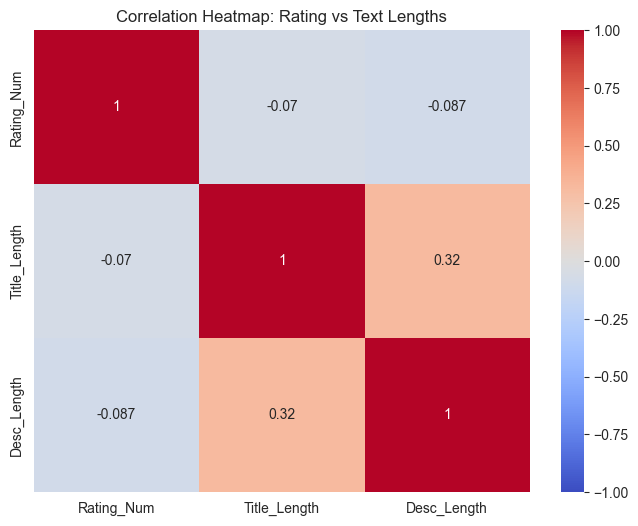

In [30]:


# 1. Clean Rating and Convert to Float
df['Rating_Num'] = df['Rating'].astype(str).str.split(',').str[0].astype(float)

# 2. Derive Numerical Features
df['Title_Length'] = df['Title'].astype(str).apply(len)
df['Desc_Length'] = df['Description'].astype(str).apply(len)
# df['User_Name_Length'] = df['User'].astype(str).apply(len) # Optional

# 3. Compute Correlation Matrix
corr_matrix = df[['Rating_Num', 'Title_Length', 'Desc_Length']].corr()

# 4. Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Rating vs Text Lengths')
plt.show()

### **Professional Analysis**

**Interpretation:** Heatmap correlating numerical rating with text length of titles and descriptions.

**Key Insight:** A lack of strong correlation suggests that verbosity in description does not necessarily influence user satisfaction ratings.

# Competitors EDA

In [26]:
df = pd.read_excel('../data/eventzella_schema_general.xlsx', sheet_name='competitor')
df.head()

brand_id bk_competitor     brand_name  rating_stars  \
0         1  COMP-DAS-001           Dash           4.2   
1         2   COMP-TT-002  Ticket Tailor           4.9   
2         3  COMP-EVI-003          Evite           4.7   
3         4   COMP-EL-004  Events Locker           4.8   
4         5  COMP-EVE-005     Eventcombo           4.9   

                                        top_features  \
0  Scheduling • Reporting & Statistics • Activity...   
1  Print-at-Home • Credit Card Processing • Alert...   
2  Email Marketing • Calendar Management • Attend...   
3  Sponsorship Management • Reporting/Analytics •...   
4  Mobile Access • Customizable Branding • Online...   

                                   brand_description  value_money  \
0  Transforming the way recreational organization...          4.2   
1   Event ticketing solution for events of all sizes          4.8   
2  Event management software for businesses & non...          4.6   
3  Exhibitor management solution for live event o...          4.7   
4  A versatile in-person & online event managemen...          5.0   

   starting_price  rating_features  
0             NaN              3.9  
1            0.28              4.7  
2           14.99              4.5  
3          677.00              4.6  
4             NaN              4.9

In [23]:
df.shape

(20, 9)

In [27]:
df.columns

Index(['brand_id', 'bk_competitor', 'brand_name', 'rating_stars',
       'top_features', 'brand_description', 'value_money', 'starting_price',
       'rating_features'],
      dtype='object')

In [28]:
df.dtypes

brand_id               int64
bk_competitor         object
brand_name            object
rating_stars         float64
top_features          object
brand_description     object
value_money          float64
starting_price       float64
rating_features      float64
dtype: object

In [35]:
df.describe()

brand_id  rating_stars  value_money  functionality
count  20.00000     20.000000     20.00000      20.000000
mean   10.50000      4.635000      4.51500       4.450000
std     5.91608      0.253969      0.30483       0.235081
min     1.00000      4.200000      3.90000       3.900000
25%     5.75000      4.400000      4.27500       4.300000
50%    10.50000      4.700000      4.55000       4.500000
75%    15.25000      4.825000      4.72500       4.600000
max    20.00000      5.000000      5.00000       4.900000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_id           20 non-null     int64  
 1   bk_competitor      20 non-null     object 
 2   brand_name         20 non-null     object 
 3   rating_stars       20 non-null     float64
 4   top_features       20 non-null     object 
 5   brand_description  20 non-null     object 
 6   value_money        20 non-null     float64
 7   starting_price     15 non-null     float64
 8   rating_features    20 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.5+ KB


In [30]:
missing_values = df.isnull().sum()
print(missing_values)

brand_id             0
bk_competitor        0
brand_name           0
rating_stars         0
top_features         0
brand_description    0
value_money          0
starting_price       5
rating_features      0
dtype: int64


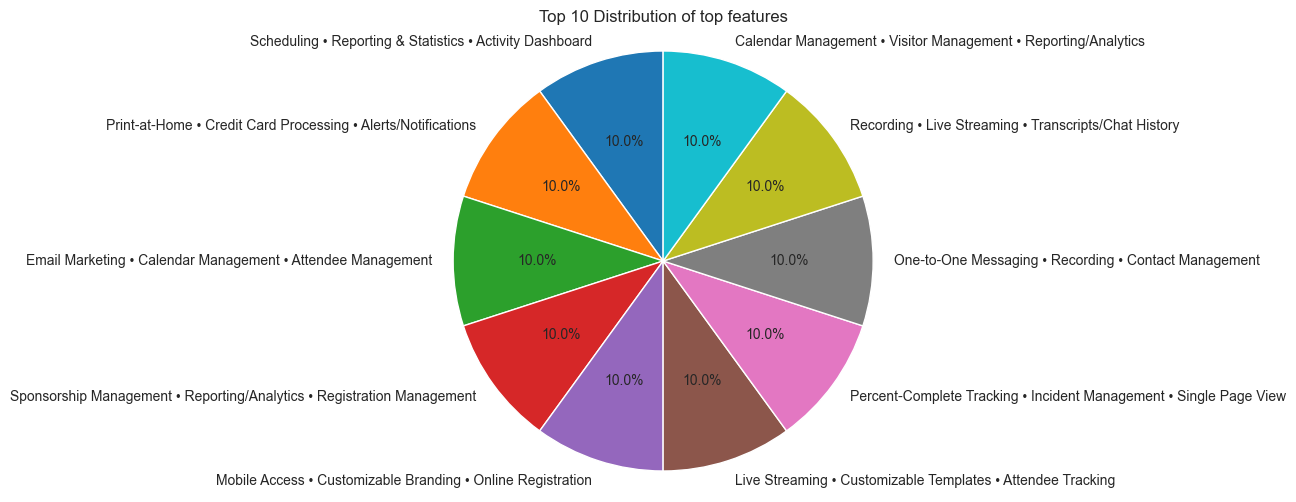

In [31]:
df['top_features'].value_counts().head(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Top 10 Distribution of top features')
plt.ylabel('')  # removes the y-label
plt.axis('equal')  # ensures the pie chart is circular
plt.show()

### **Professional Analysis**

**Interpretation:** Distribution of the most common features listed by competitors.

**Key Insight:** Identifying standard features helps in defining the "Minimum Viable Product" baseline for competing in the market.

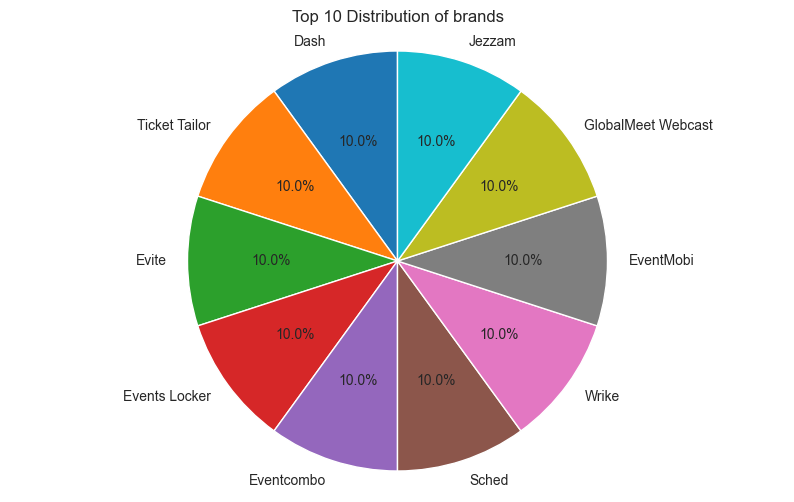

In [45]:
df['brand_name'].value_counts().head(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Top 10 Distribution of brands')
plt.ylabel('')  # removes the y-label
plt.axis('equal')  # ensures the pie chart is circular
plt.show()

### **Professional Analysis**

**Interpretation:** Market share estimation based on the occurrence of top brands.

**Key Insight:** Dominance by a few brands indicates a consolidated market, whereas a fragmented pie suggests opportunities for new entrants.

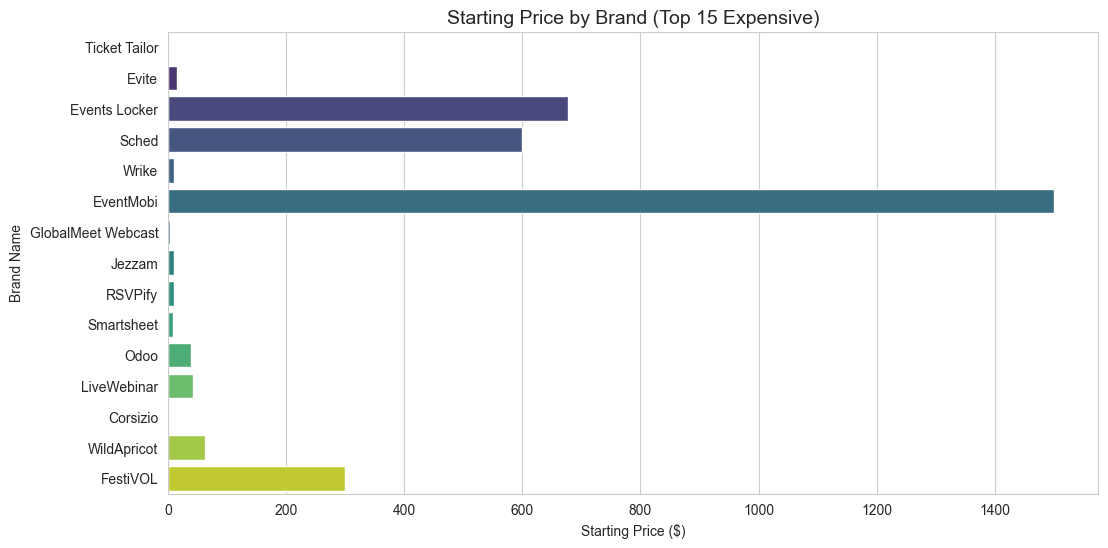

In [53]:

# 1. Clean Starting Price (Extract numbers, handle "Free" or ranges)
# Logic: Extract first number found. If "Free", set to 0.
df['price_clean'] = df['starting_price'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df.loc[df['starting_price'].str.contains('Free', case=False, na=False), 'price_clean'] = 0

# 2. Filter Top Brands (to avoid clutter if too many brands)
# We take the top 15 most expensive or most frequent brands
top_brands = df.groupby('brand_name')['price_clean'].mean().nlargest(15).index
df_filtered = df[df['brand_name'].isin(top_brands)]

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='price_clean', y='brand_name', data=df_filtered, palette='viridis',hue='brand_name')

plt.title('Starting Price by Brand (Top 15 Expensive)', fontsize=14)
plt.xlabel('Starting Price ($)')
plt.ylabel('Brand Name')
plt.show()

### **Professional Analysis**

**Interpretation:** Compares the average starting prices of the top 15 most expensive brands.

**Key Insight:** This benchmarking establishes the premium price ceiling in the market and helps in positioning one's own pricing strategy.

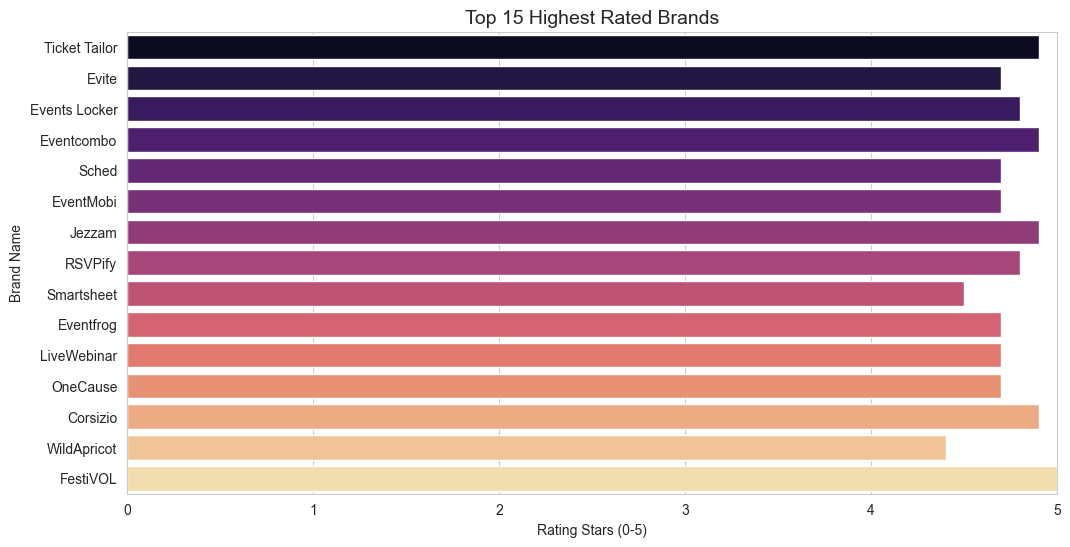

In [55]:
plt.figure(figsize=(12, 6))

# 1. Filter Top Brands by Rating (e.g. Top 15 highest rated)
# Or if you want to see the distribution for the same expensive brands as before, reuse 'top_brands'.
# Here we find the best rated ones:
top_rated_brands = df.groupby('brand_name')['rating_stars'].mean().nlargest(15).index
df_filtered_rating = df[df['brand_name'].isin(top_rated_brands)]

# 2. Plot
sns.barplot(
    x='rating_stars', 
    y='brand_name', 
    data=df_filtered_rating, 
    palette='magma', 
    hue='brand_name', 
    legend=False
)

plt.title('Top 15 Highest Rated Brands', fontsize=14)
plt.xlabel('Rating Stars (0-5)')
plt.ylabel('Brand Name')
plt.xlim(0, 5)  # Ensure x-axis goes from 0 to 5
plt.show()

### **Professional Analysis**

**Interpretation:** Shows the average ratings for the top rated competitor brands.

**Key Insight:** Benchmarking against these high-performing brands provides targets for customer satisfaction and service quality.

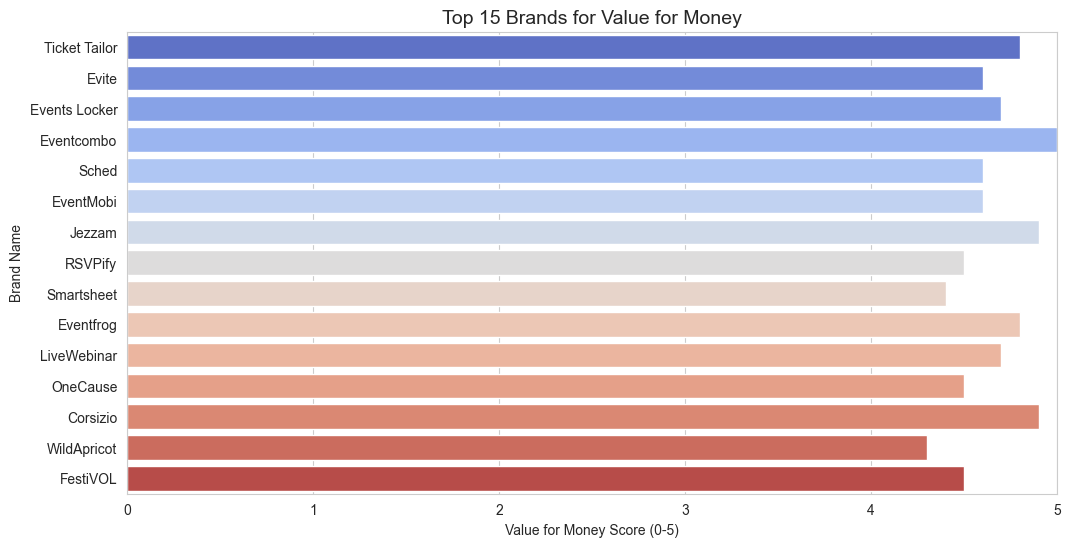

In [56]:
plt.figure(figsize=(12, 6))

# 1. Filter Top Brands by Value for Money
top_value_brands = df.groupby('brand_name')['value_money'].mean().nlargest(15).index
df_filtered_value = df[df['brand_name'].isin(top_value_brands)]

# 2. Plot
sns.barplot(
    x='value_money', 
    y='brand_name', 
    data=df_filtered_value, 
    palette='coolwarm', 
    hue='brand_name', 
    legend=False
)

plt.title('Top 15 Brands for Value for Money', fontsize=14)
plt.xlabel('Value for Money Score (0-5)')
plt.ylabel('Brand Name')
plt.xlim(0, 5)
plt.show()

### **Professional Analysis**

**Interpretation:** Ranks brands based on their value-for-money scores.

**Key Insight:** Brands with high value-for-money scores often sustain higher customer loyalty, serving as a key competitive metric.

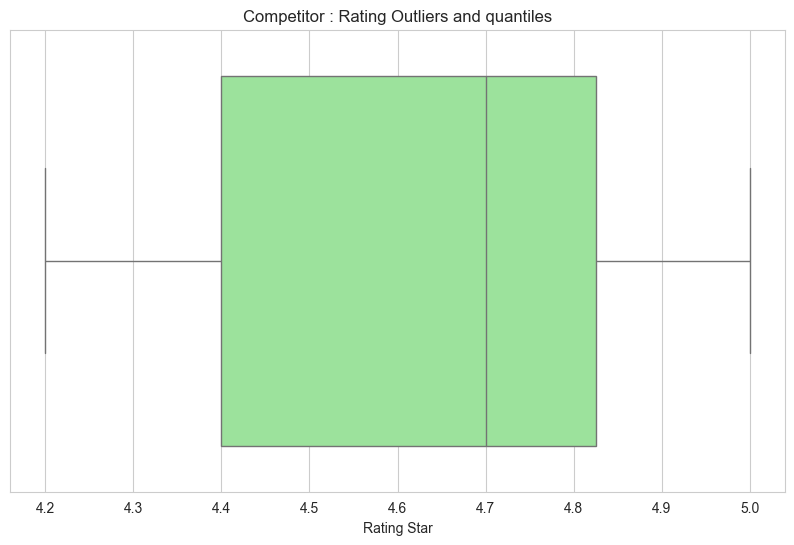

In [39]:
sns.boxplot(x=df['rating_stars'].dropna(), color='lightgreen')
plt.title('Competitor : Rating Outliers and quantiles')
plt.xlabel('Rating Star')
plt.show()

### **Professional Analysis**

**Interpretation:** Boxplots analyzing the spread and outliers for ratings.

**Key Insight:** Outliers help identify niche competitors who might be over-delivering in specific areas to gain market share.

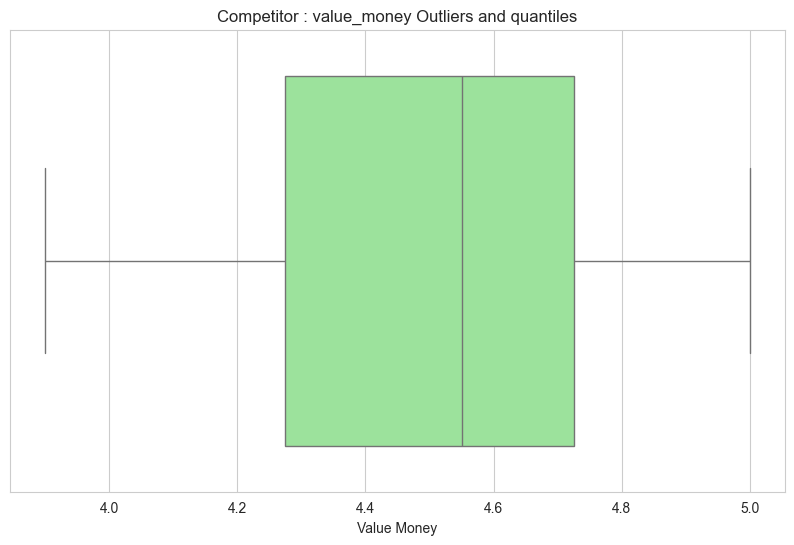

In [41]:
sns.boxplot(x=df['value_money'].dropna(), color='lightgreen')
plt.title('Competitor : value_money Outliers and quantiles')
plt.xlabel('Value Money')
plt.show()

### **Professional Analysis**

**Interpretation:** Boxplots analyzing the spread and outliers for value for money.

**Key Insight:** High variance in value for money scores indicates disparate pricing strategies across the competitive landscape.

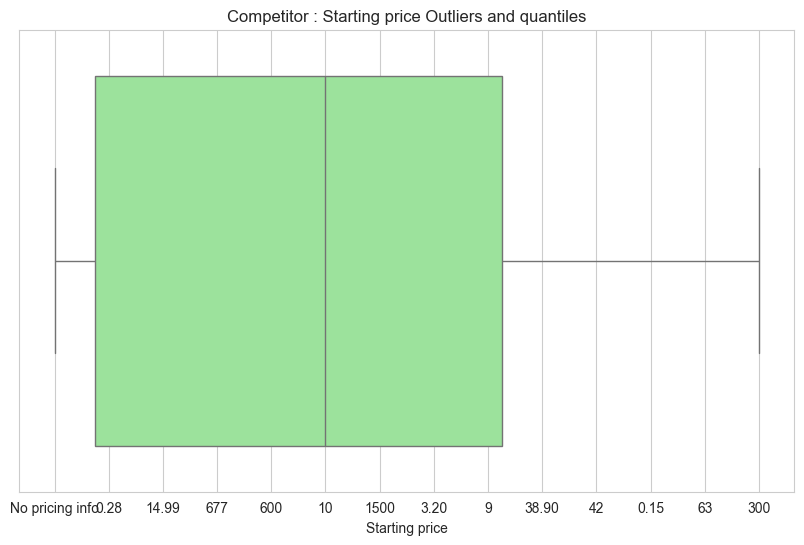

In [43]:
sns.boxplot(x=df['starting_price'].dropna(), color='lightgreen')
plt.title('Competitor : Starting price Outliers and quantiles')
plt.xlabel('Starting price')
plt.show()

### **Professional Analysis**

**Interpretation:** Boxplots analyzing the spread and outliers for starting price.

**Key Insight:** Significant outliers in starting price denote the existence of luxury or specialized tiers within the market.

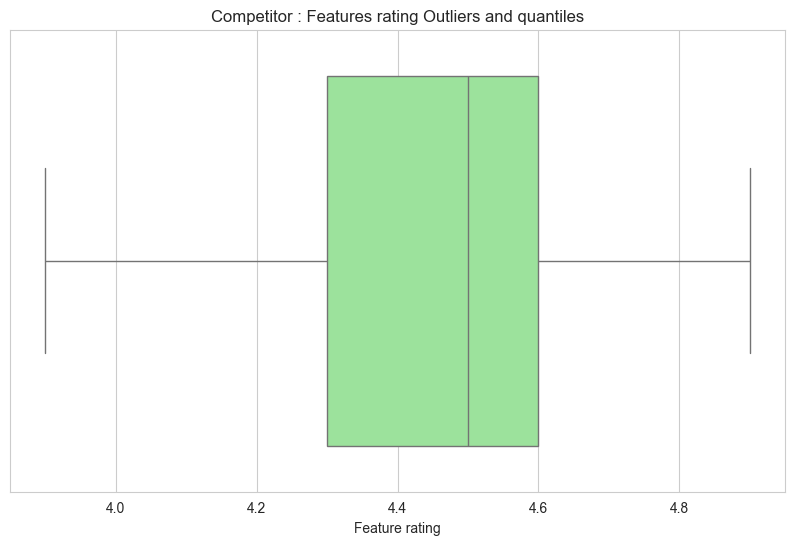

In [44]:
sns.boxplot(x=df['functionality'].dropna(), color='lightgreen')
plt.title('Competitor : Features rating Outliers and quantiles')
plt.xlabel('Feature rating')
plt.show()

### **Professional Analysis**

**Interpretation:** Boxplots analyzing the spread and outliers for functionality ratings.

**Key Insight:** Consistency in functionality ratings sets the standard, while outliers highlight potential differentiators.

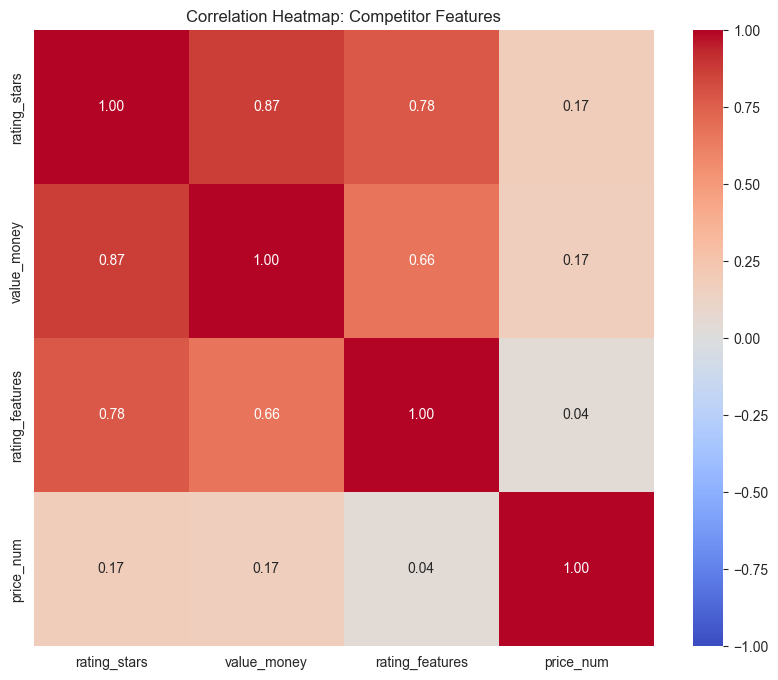

In [33]:

# 1. Clean 'starting_price' (extract float if possible, e.g. "$10.00" -> 10.0)
# This assumes the column contains strings like "$10" or "£20".
# If it's already clean or mixed, 'coerce' handles errors by setting them to NaN.
df['price_num'] = pd.to_numeric(df['starting_price'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# 2. Select Numerical Columns of Interest
cols_to_corr = ['rating_stars', 'value_money', 'rating_features', 'price_num']

# 3. Compute Correlation
corr_matrix = df[cols_to_corr].corr()

# 4. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: Competitor Features')
plt.show()

### **Professional Analysis**

**Interpretation:** Correlation matrix between competitor metrics (price, rating, features).

**Key Insight:** A positive correlation between price and features would validate a value-based pricing model in the current market landscape.